In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [3]:
df_wine = pd.read_csv('wine-clustering.csv')

In [4]:
df_wine.info()
print('O dataset tem',df_wine.shape[0], 'linhas e ',df_wine.shape[1], 'de colunas')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
O dataset tem 178 linhas e  13 de colunas


In [5]:
df_wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
print(df_wine.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

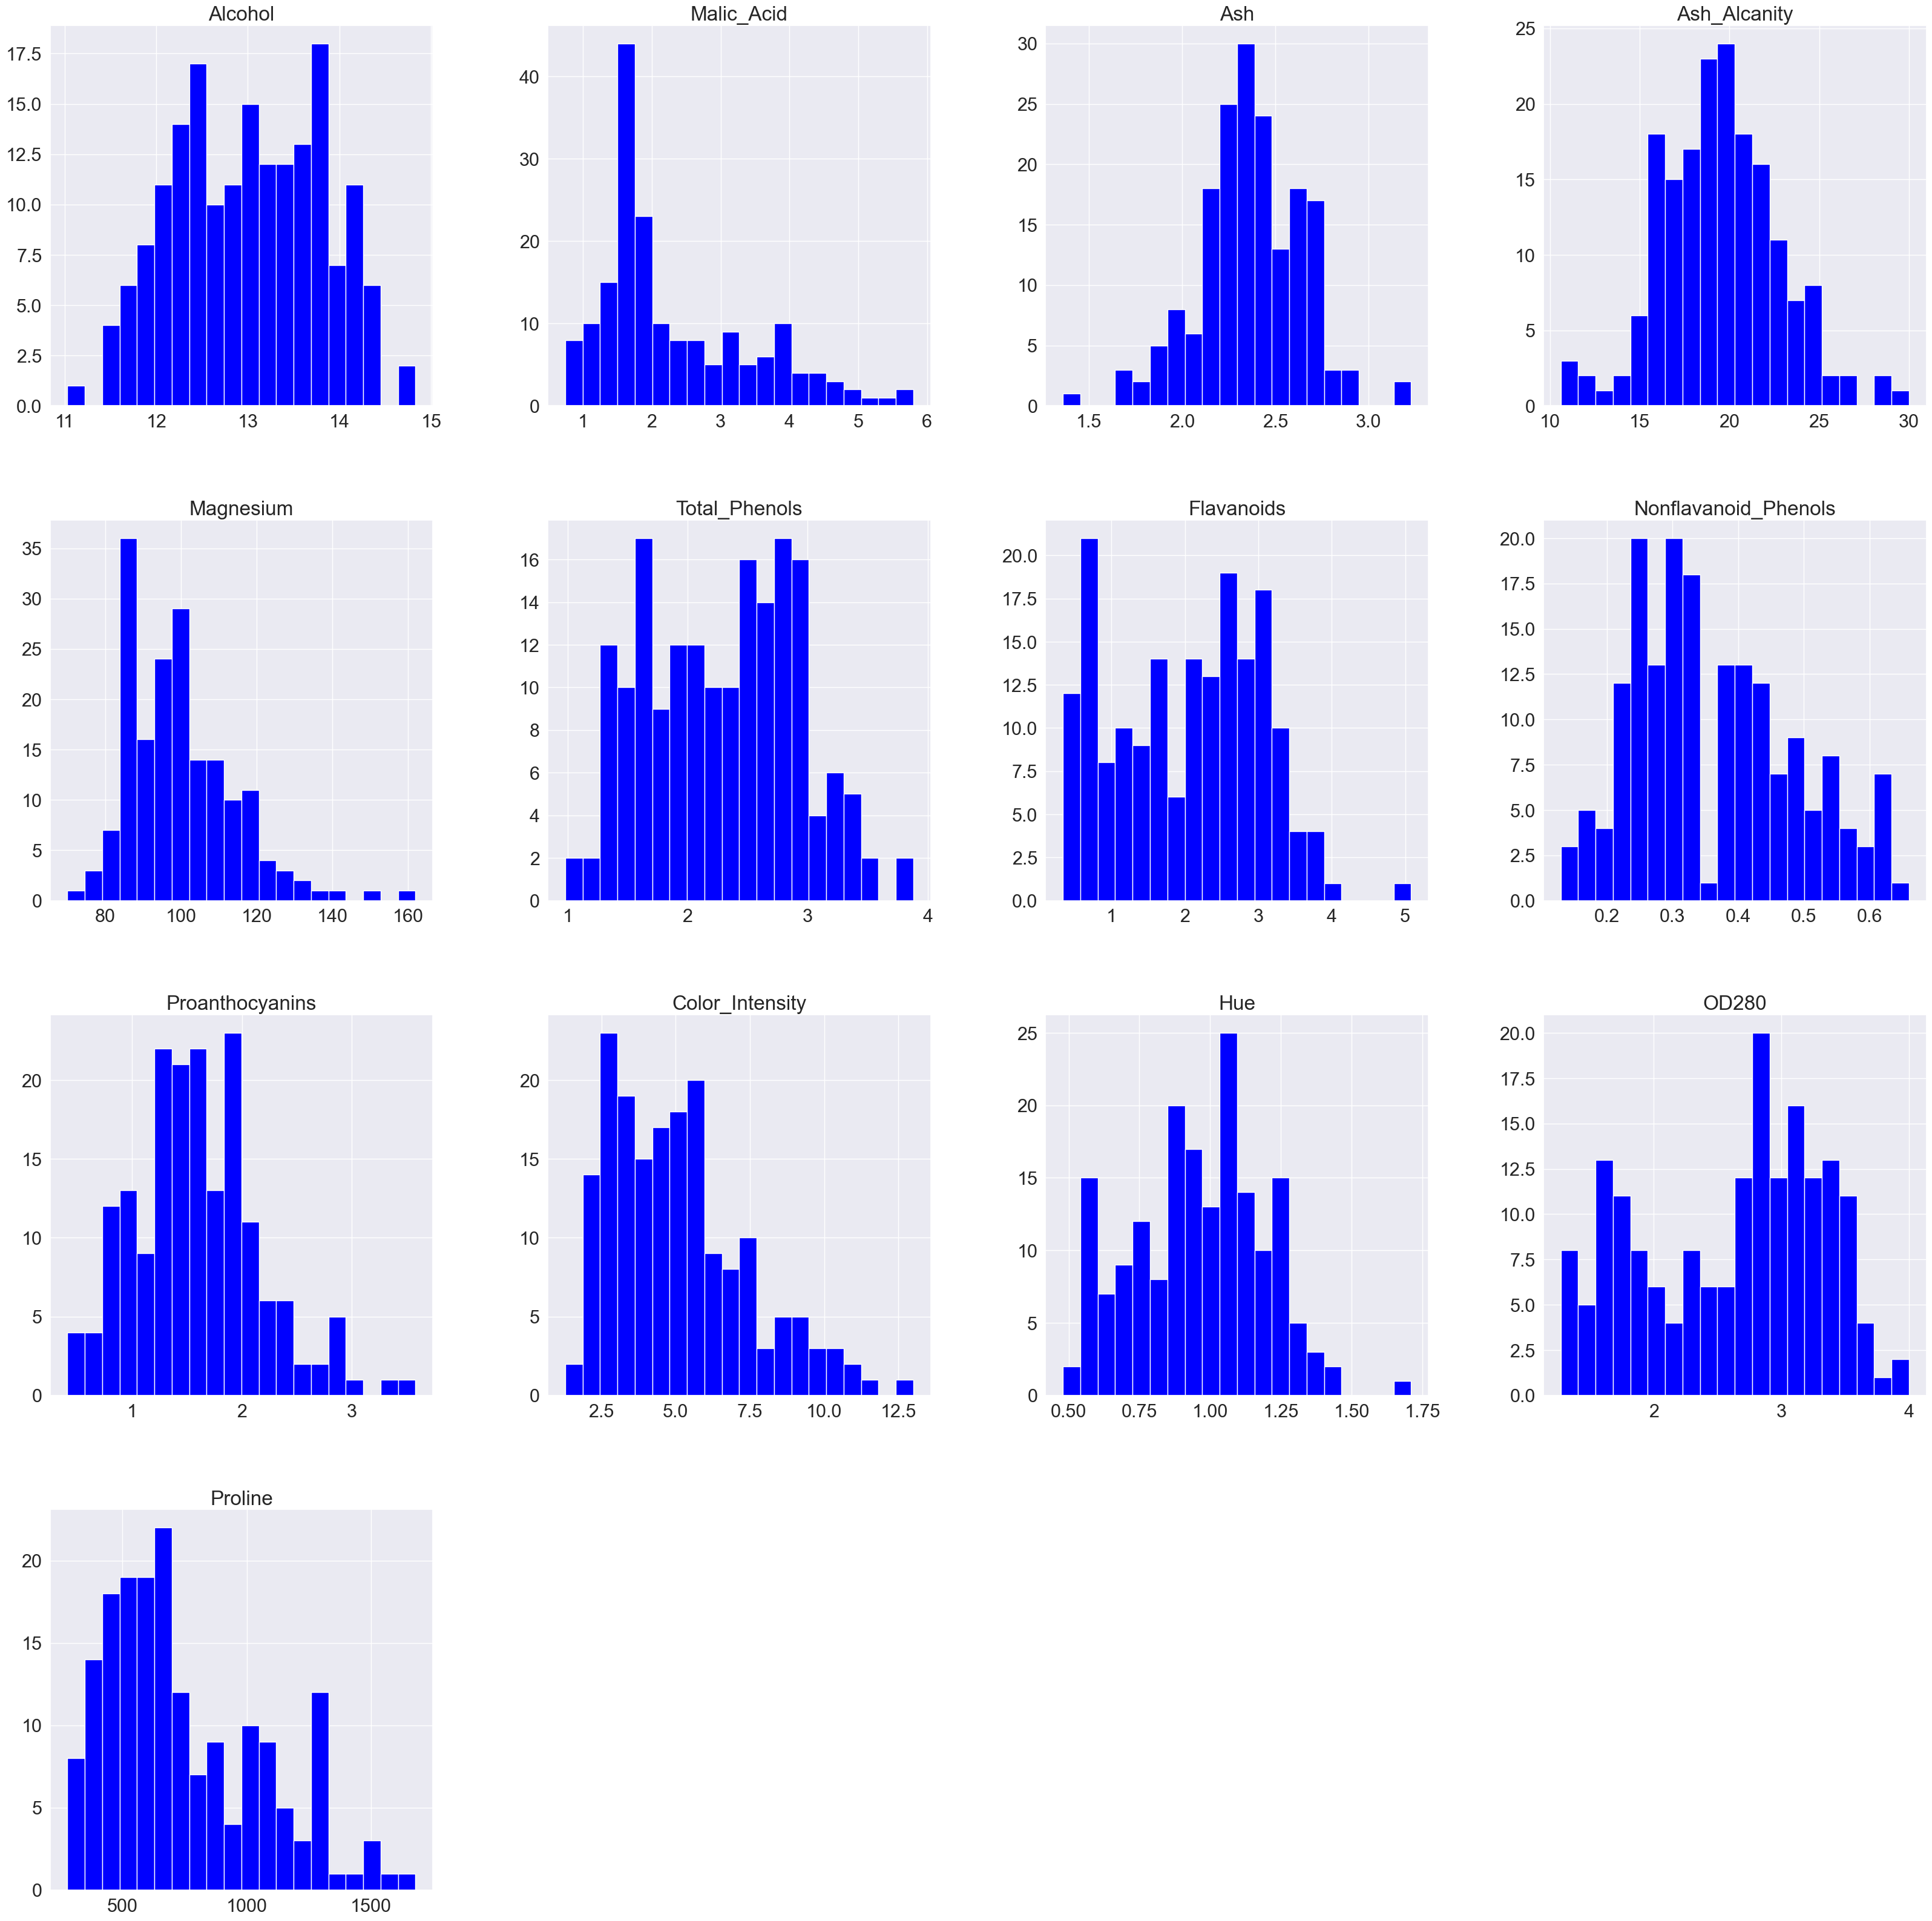

In [7]:
sns.set(style='darkgrid',font_scale=2, rc={'figure.figsize':(40,40)})
ax=df_wine.hist(bins=20,color='blue' )

The histograms above give us insight into the distrubtion of our data. Here, we can see the distribution of values for each feature. At a glance, Proline, Color_Intensity, Magnesium, and Malic_Acid appear to have higher distributions of data towards lower values (the left side of the histograms). All other features appear to have relatively more balanced distribution. We can gain further insight into the distribution of the dataset by using the .skew() function (below)

In [8]:
df_wine.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

By using data.skew(), we can further determine the distribution of data for each feature. A feature with a skew of 0 would represent data that has perfectly balanced distribution. Features with skews greater than 0 have a higher distribution of data towards the left, and features with skews less than 0 have a higher distribution towards the right. Here, we can confirm that Proline, Color_Intensity, Magnesium, and Malic_Acid have significant skews towards the left. In contrast, OD280 has the highest skew towards the right side of the data. Hue appears to have the most balanced distribution of data, with a skew of only 0.021.

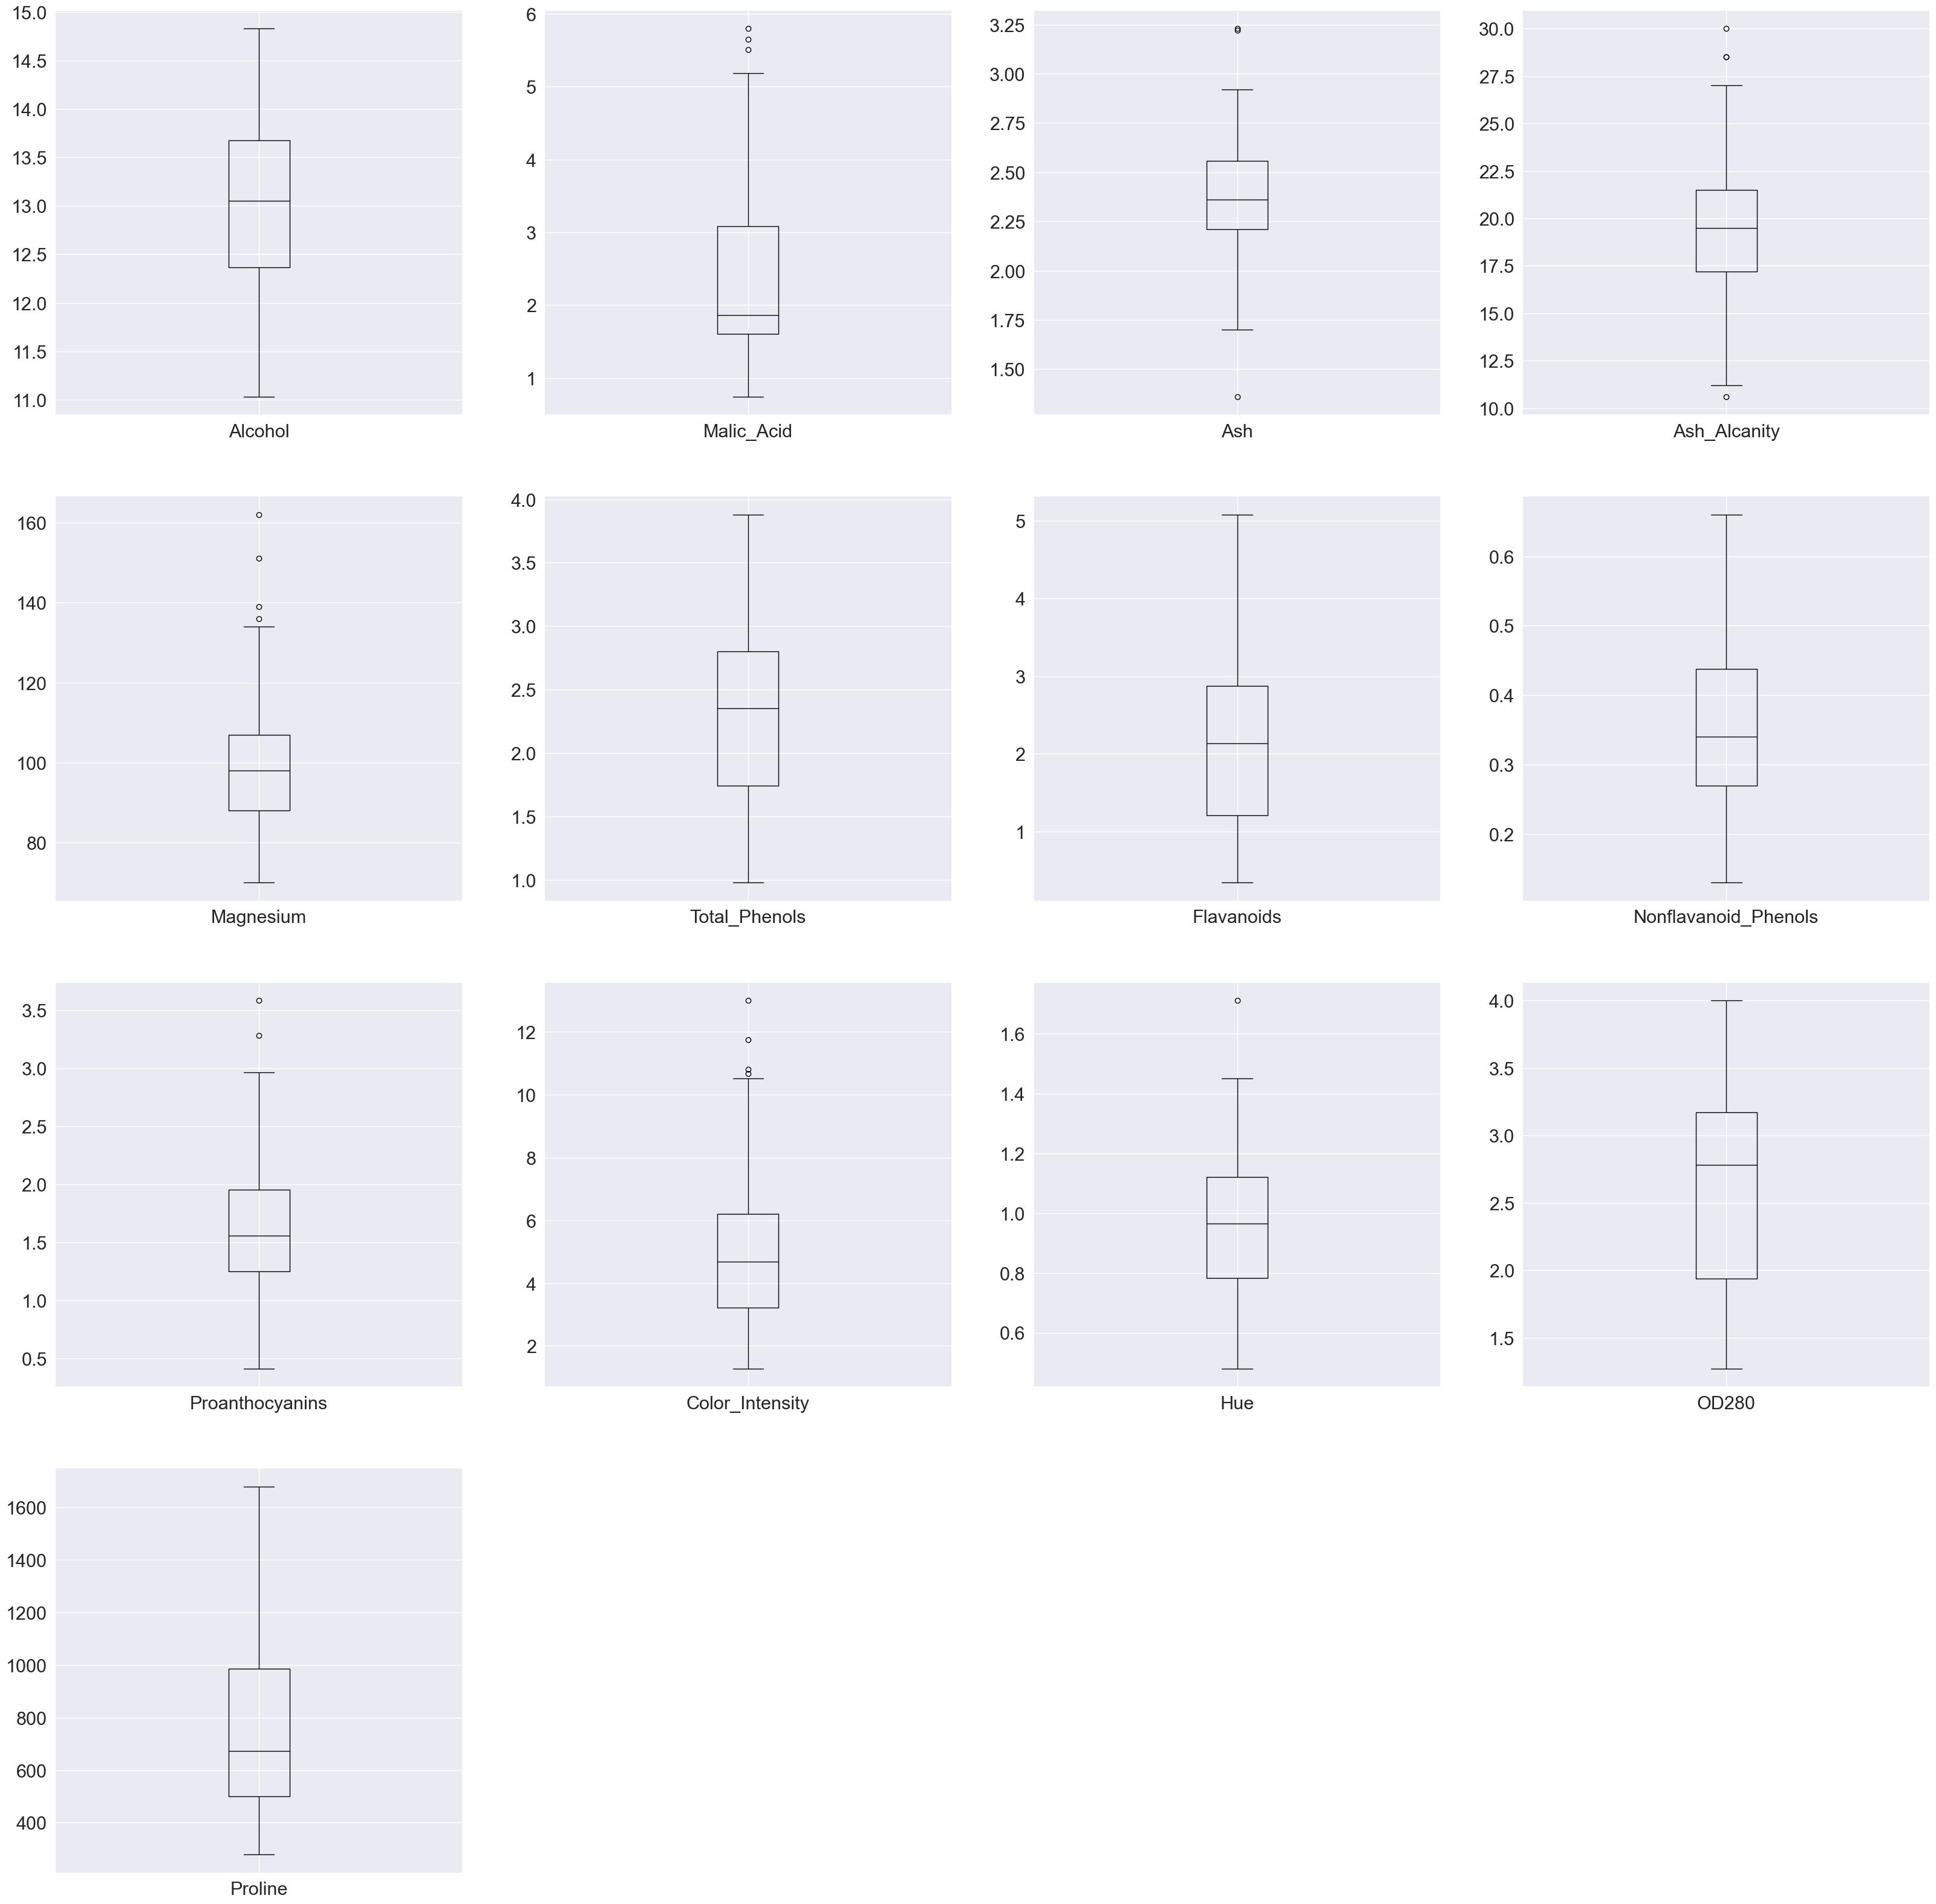

In [9]:
# Plotting the distribution of data with boxplots
df_wine.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

The box plots above provide another look at the distribution of the data. For example, the high left-sided skew of Malic_Acid can be interpreted by the line closer to the bottom of its box, i.e. the data is skewed towards lower values. These box plots also highlight outliers. For example, hue has an outlier value that exists outside of its average distribution of data. While outliers can be removed to potentially increase the accuracy of implemented models, I have decided to keep the data as is. This helps us maintain the most realistic picture of the data.

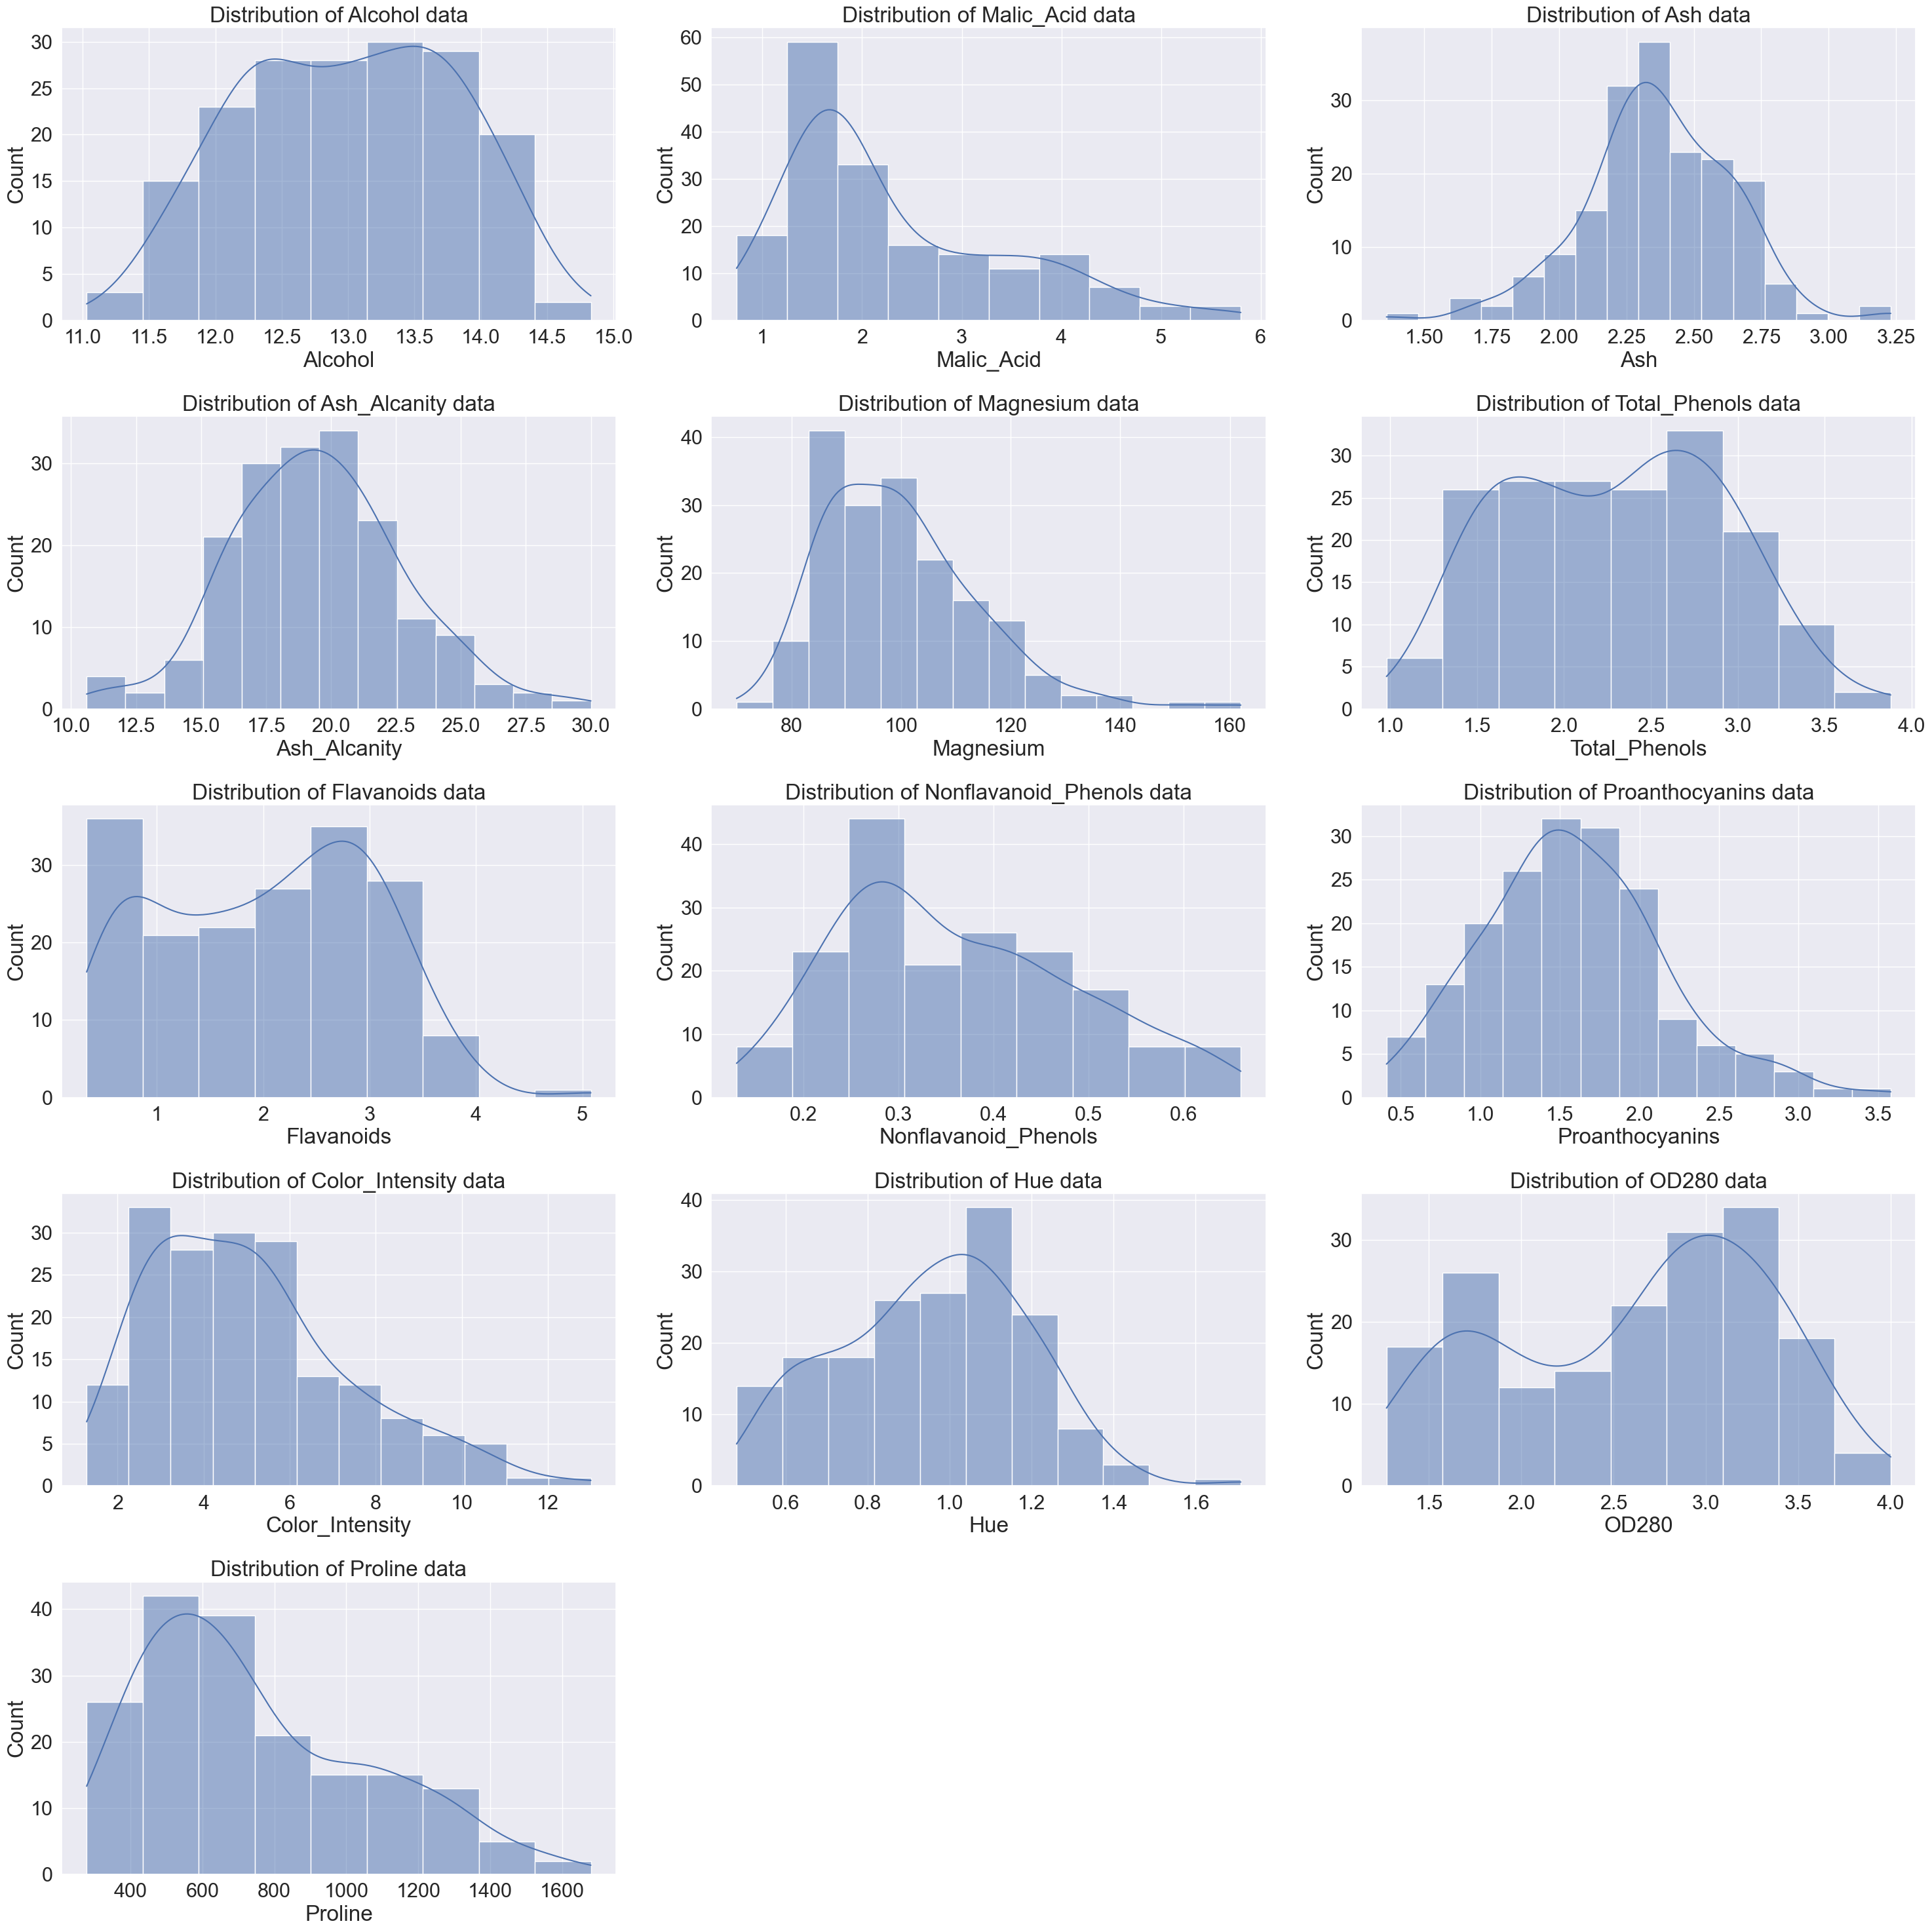

In [10]:
plt.figure(figsize=(30,30))
for i,col in enumerate(df_wine.columns,1):
    plt.subplot(5,3,i)
    plt.title(f"Distribution of {col} data")
    sns.histplot(df_wine[col],kde=True)
    plt.tight_layout()
    plt.plot()

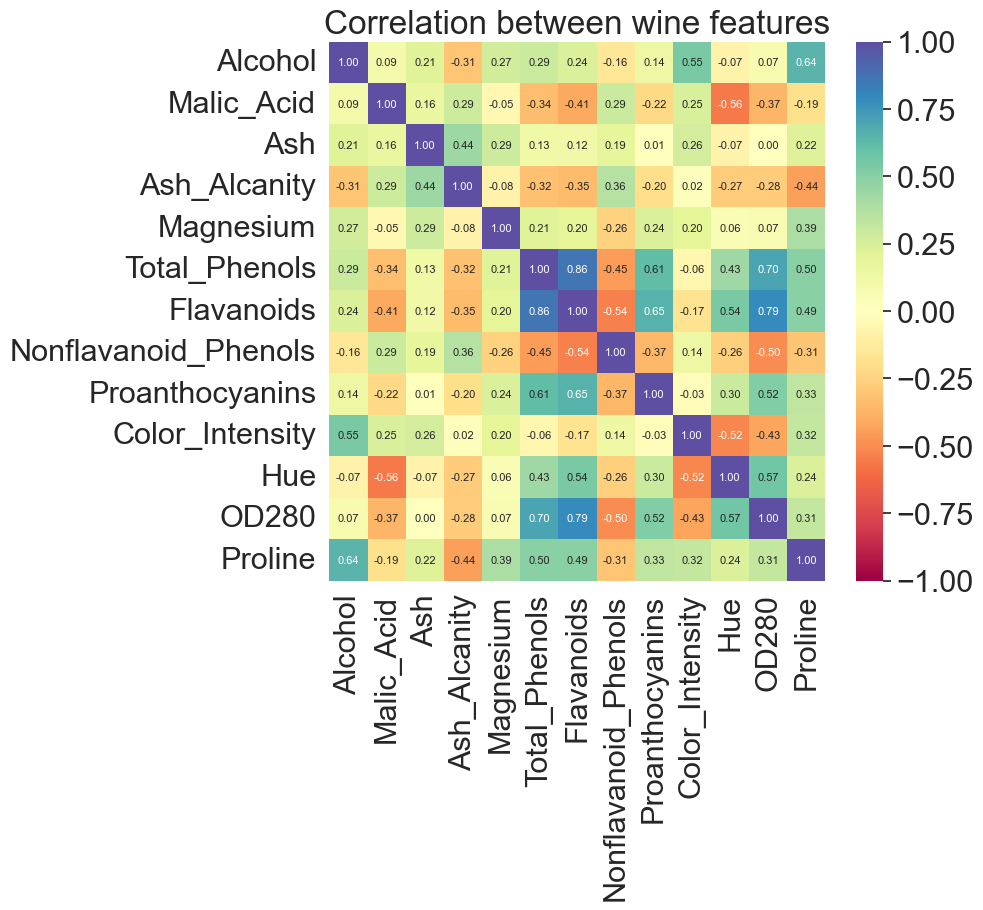

In [11]:
plt.figure(figsize=(8,7))
sns.heatmap(df_wine.corr(), annot=True, vmin = -1, vmax = 1, fmt = '.2f', annot_kws={"fontsize":8}, cmap="Spectral")
plt.title("Correlation between wine features")
plt.show()

Bivariate Analysis Summary

Alcohol is strongly correlate to Proline
Total phenols is strongly correlated to OD280, Proanthocyanins and Flavanoids
Flavanoids is strongly correlated to OD280 and Proanthocyanins
Malic Acid has a medium negative correlation with Hue
Flavanoids has a medium negative correlation to Non flavanoid phenols
Non flavanoid phenols has a medium negative correlation with OD280
Color intensity has a medium negative correlation with Hue

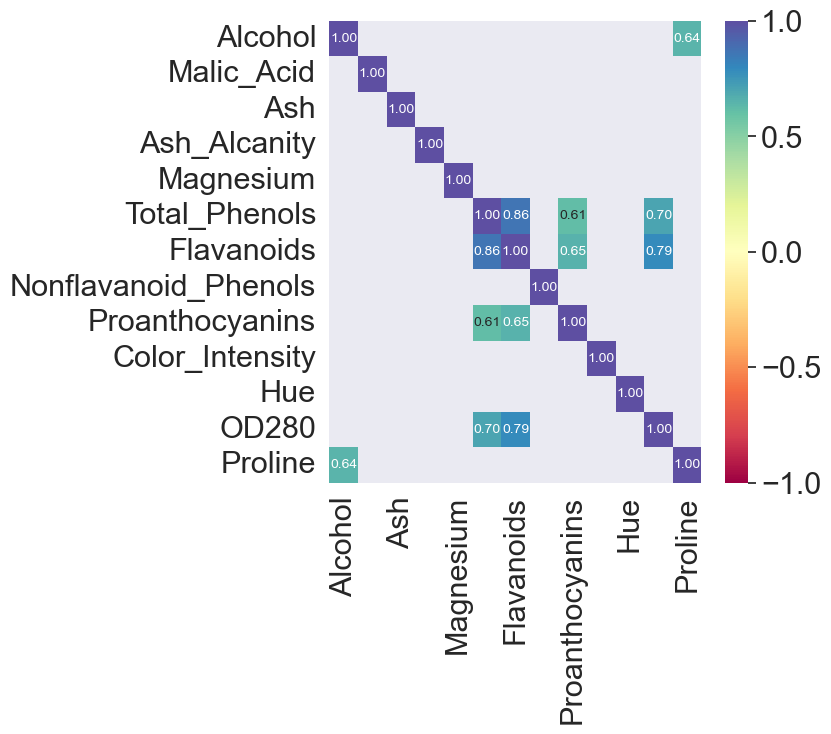

In [12]:
corr =df_wine.corr().abs()
high_corr =corr[(corr)>0.6]
plt.figure(figsize =(6,6))
sns.heatmap(high_corr , annot=True, vmin = -1, vmax = 1, fmt = '.2f', annot_kws={"fontsize":10}, cmap="Spectral")
plt.show()

In [13]:
#Algumas análises gráficas das propriedades dos tipos de vinho 
fig = px.scatter(df_wine, x="Flavanoids", y="Nonflavanoid_Phenols", color="Hue",size='Total_Phenols')
fig.show()

In [14]:
fig = px.scatter_3d(df_wine, x='Alcohol', y='Malic_Acid', z='Ash',color='Hue')
fig.show()

EDA Summary
Through the EDA above, we were firstly able to determine the overall structure of the dataset. There are 178 total entries (rows) and 13 features (columns) in the dataset. The data types of each column are numerical and are either float64 or int64. After checking for null values, we found that there are none. Next, histograms and boxplots highlighted the distribution of the data. There is significant left-sided skew for Proline, Color_Intensity, Magnesium, and Malic_Acid. Furthermore, several features have outlier values. However, these values will not be dropped from the dataset. Lastly, a heatmap shows strong correlations between Total_Phenols and Flavanoids (0.86) and between Flavanoids and OD280 (0.79). Both correlations can be explained by brief research into the phenolic content of wine.

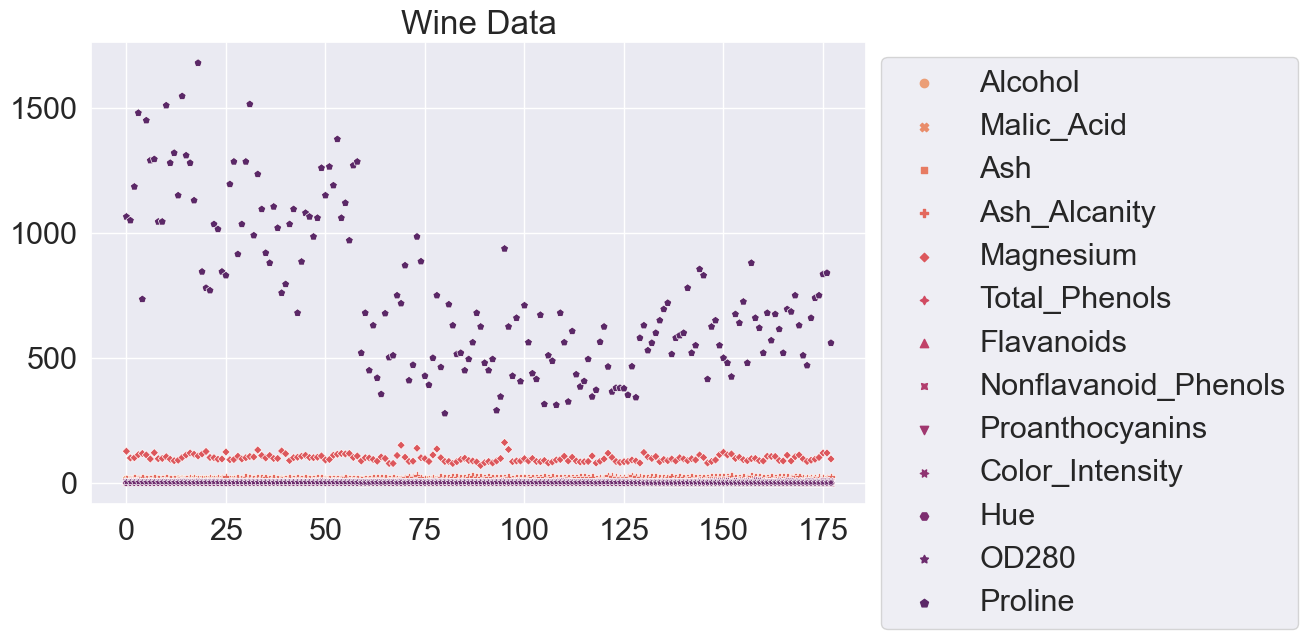

In [15]:
#Padronização

plt.figure(figsize=(10,6))
sns.scatterplot(data= df_wine,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [16]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_wine)


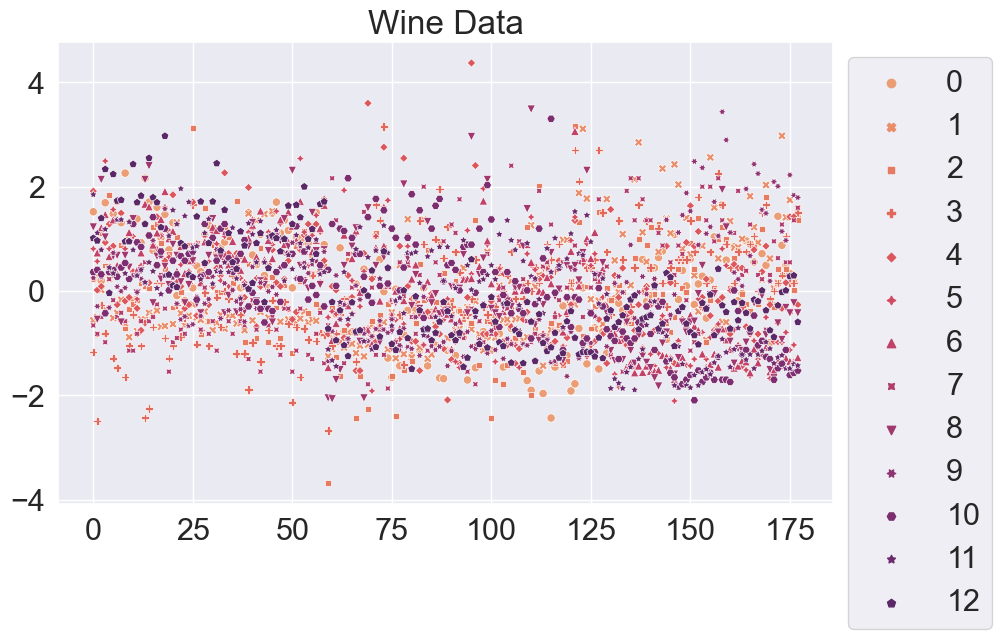

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= X_standardized,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

CLUSTERIZAÇÃO

In [18]:
#Divisão do dataset em treino, validação e teste

from sklearn.model_selection import train_test_split

x_train, test = train_test_split(X_standardized, test_size=0.4,random_state=42 )
x_val, x_test = train_test_split(test, test_size= 0.5, random_state=42)

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

K-means Clustering ¶
K-Means clustering is a partitioning method that aims to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean.

In [20]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(x_train)
train_kmeans_avg = silhouette_score(x_train, labels_train)

labels_validation = k_means.predict(x_val)
val_kmeans_avg = silhouette_score(x_val, labels_validation)

labels_test = k_means.predict(x_test)
test_kmeans_avg = silhouette_score(x_test, labels_test)

results = []

results.append({'Model Name' : 'Kmeans',
                'Training Set ': train_kmeans_avg,
                'Validation Set' : val_kmeans_avg,
                 'Testing Set': test_kmeans_avg})

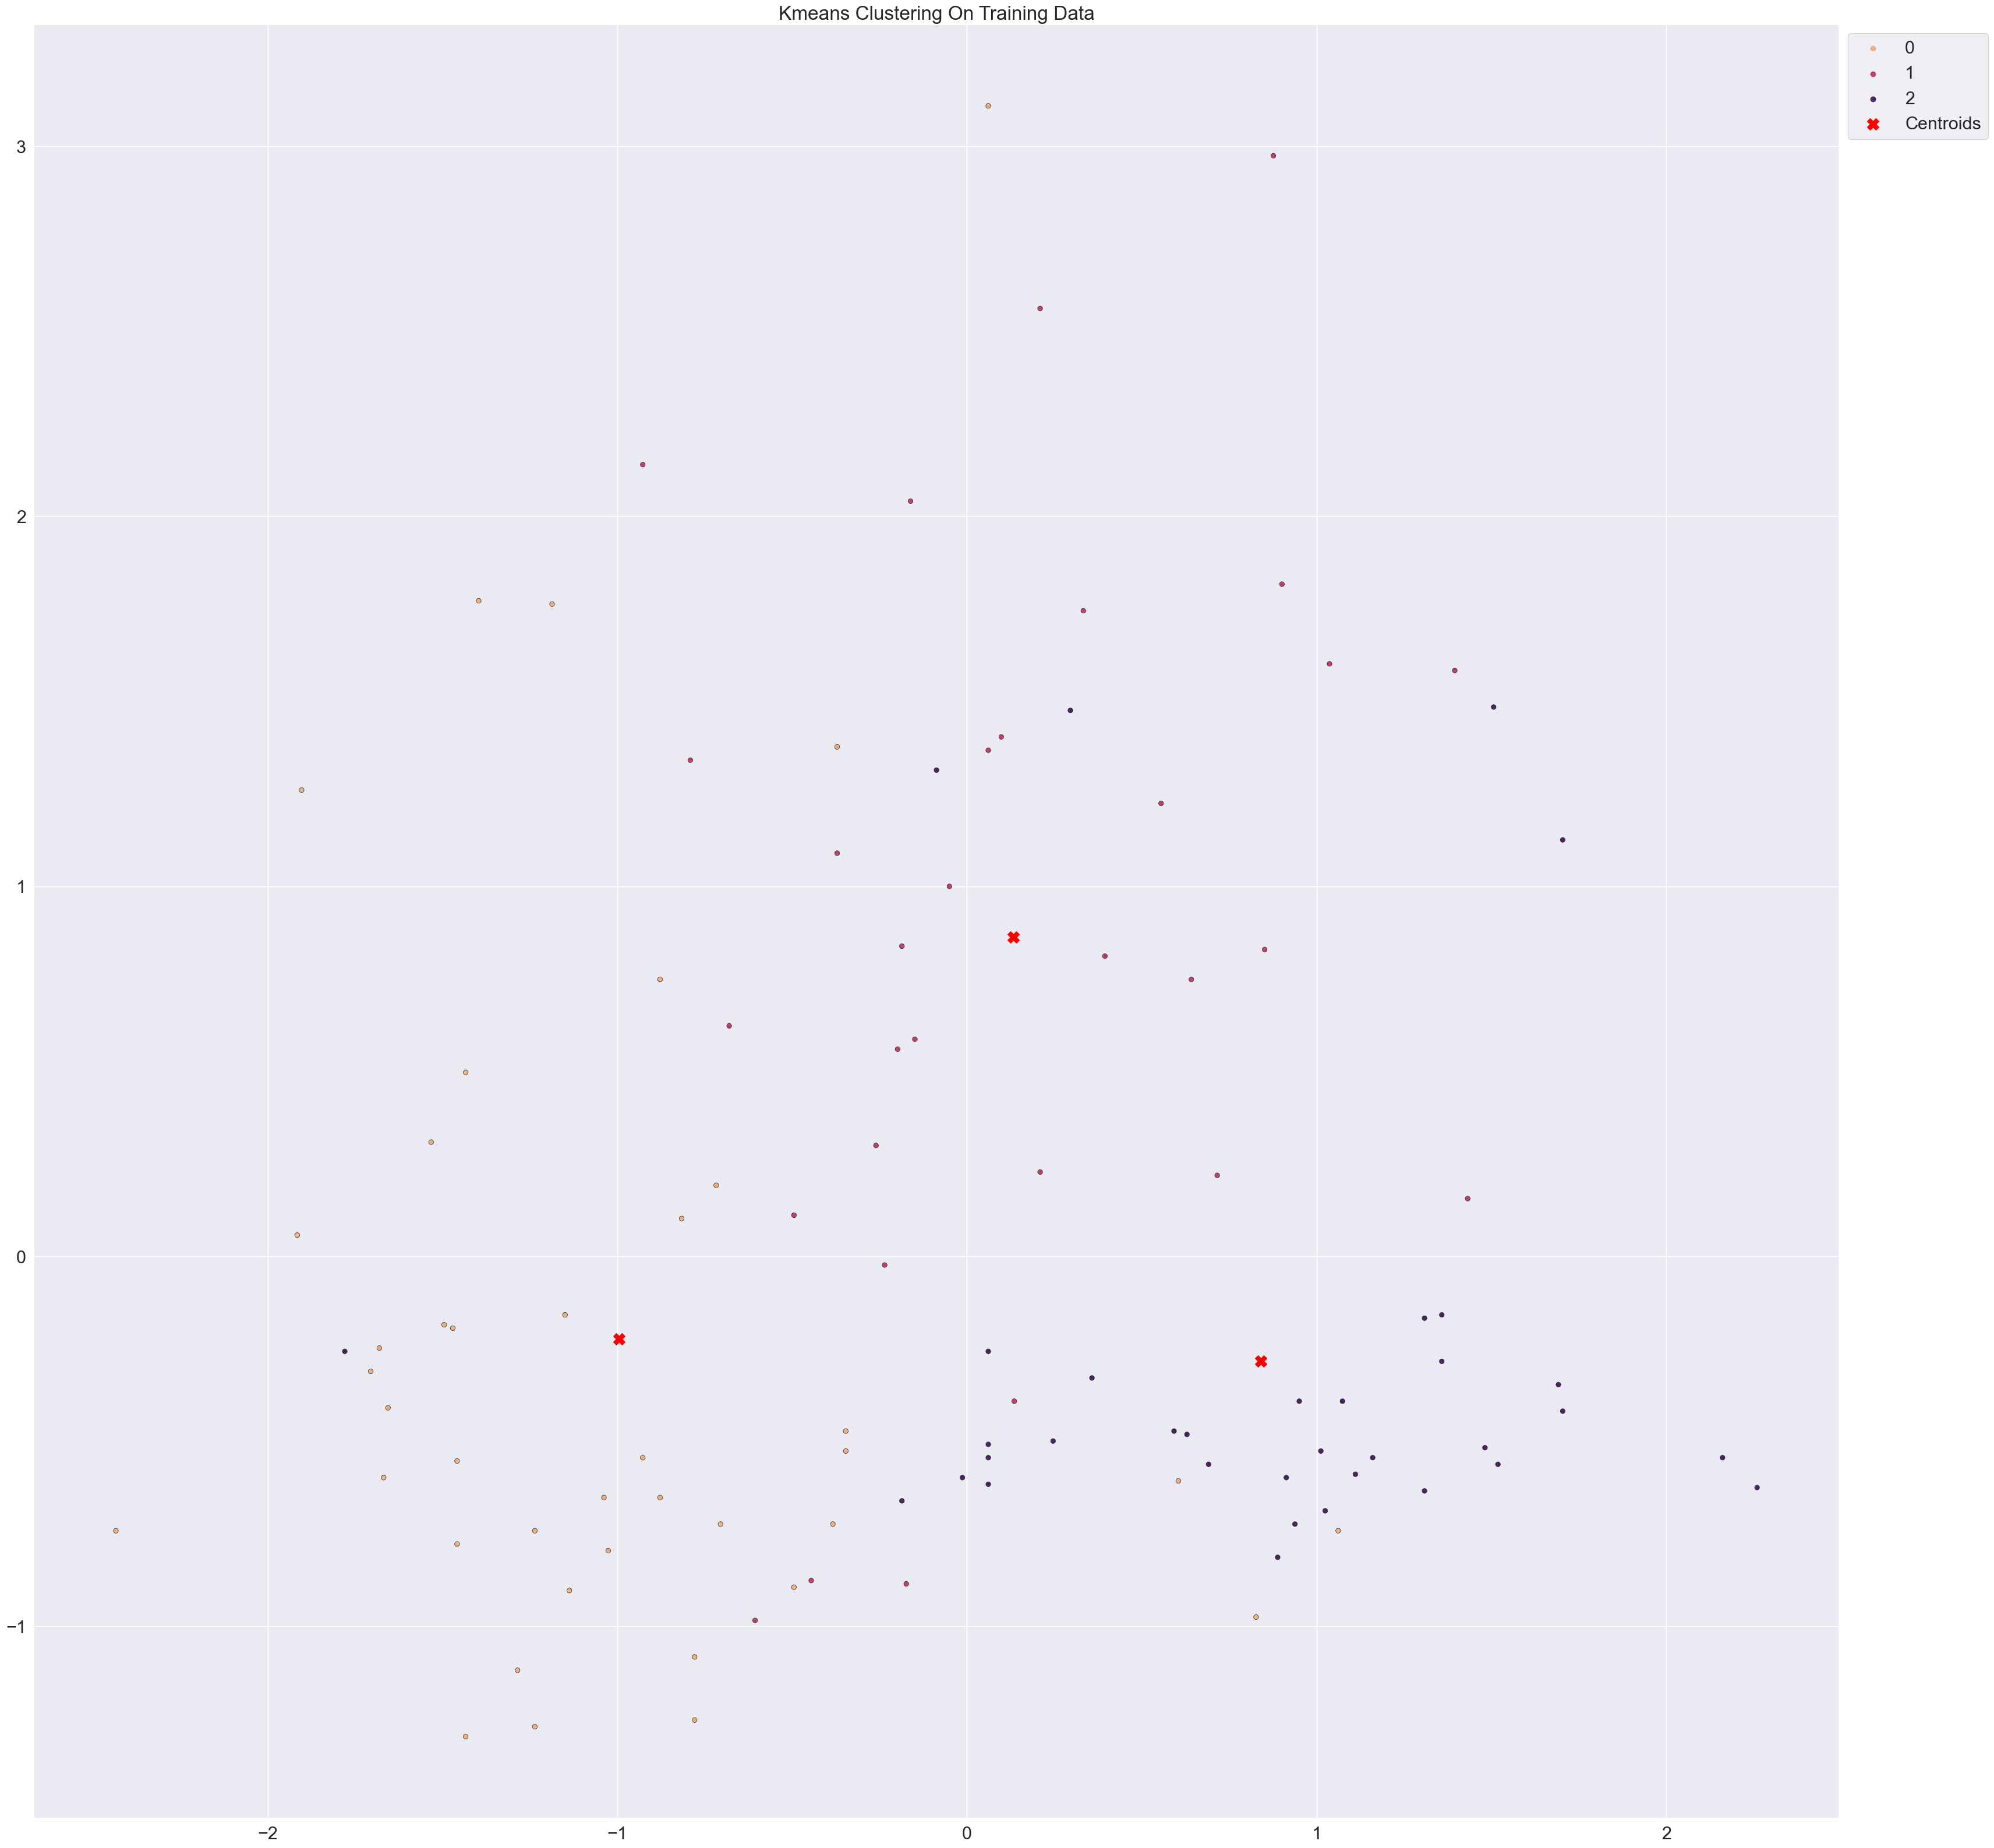

Silhouette Score on Training Set: 0.2808620526436533


In [21]:
sns.scatterplot(x=x_train[:,0], y= x_train[:,1], data= x_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Training Set: {train_kmeans_avg}')

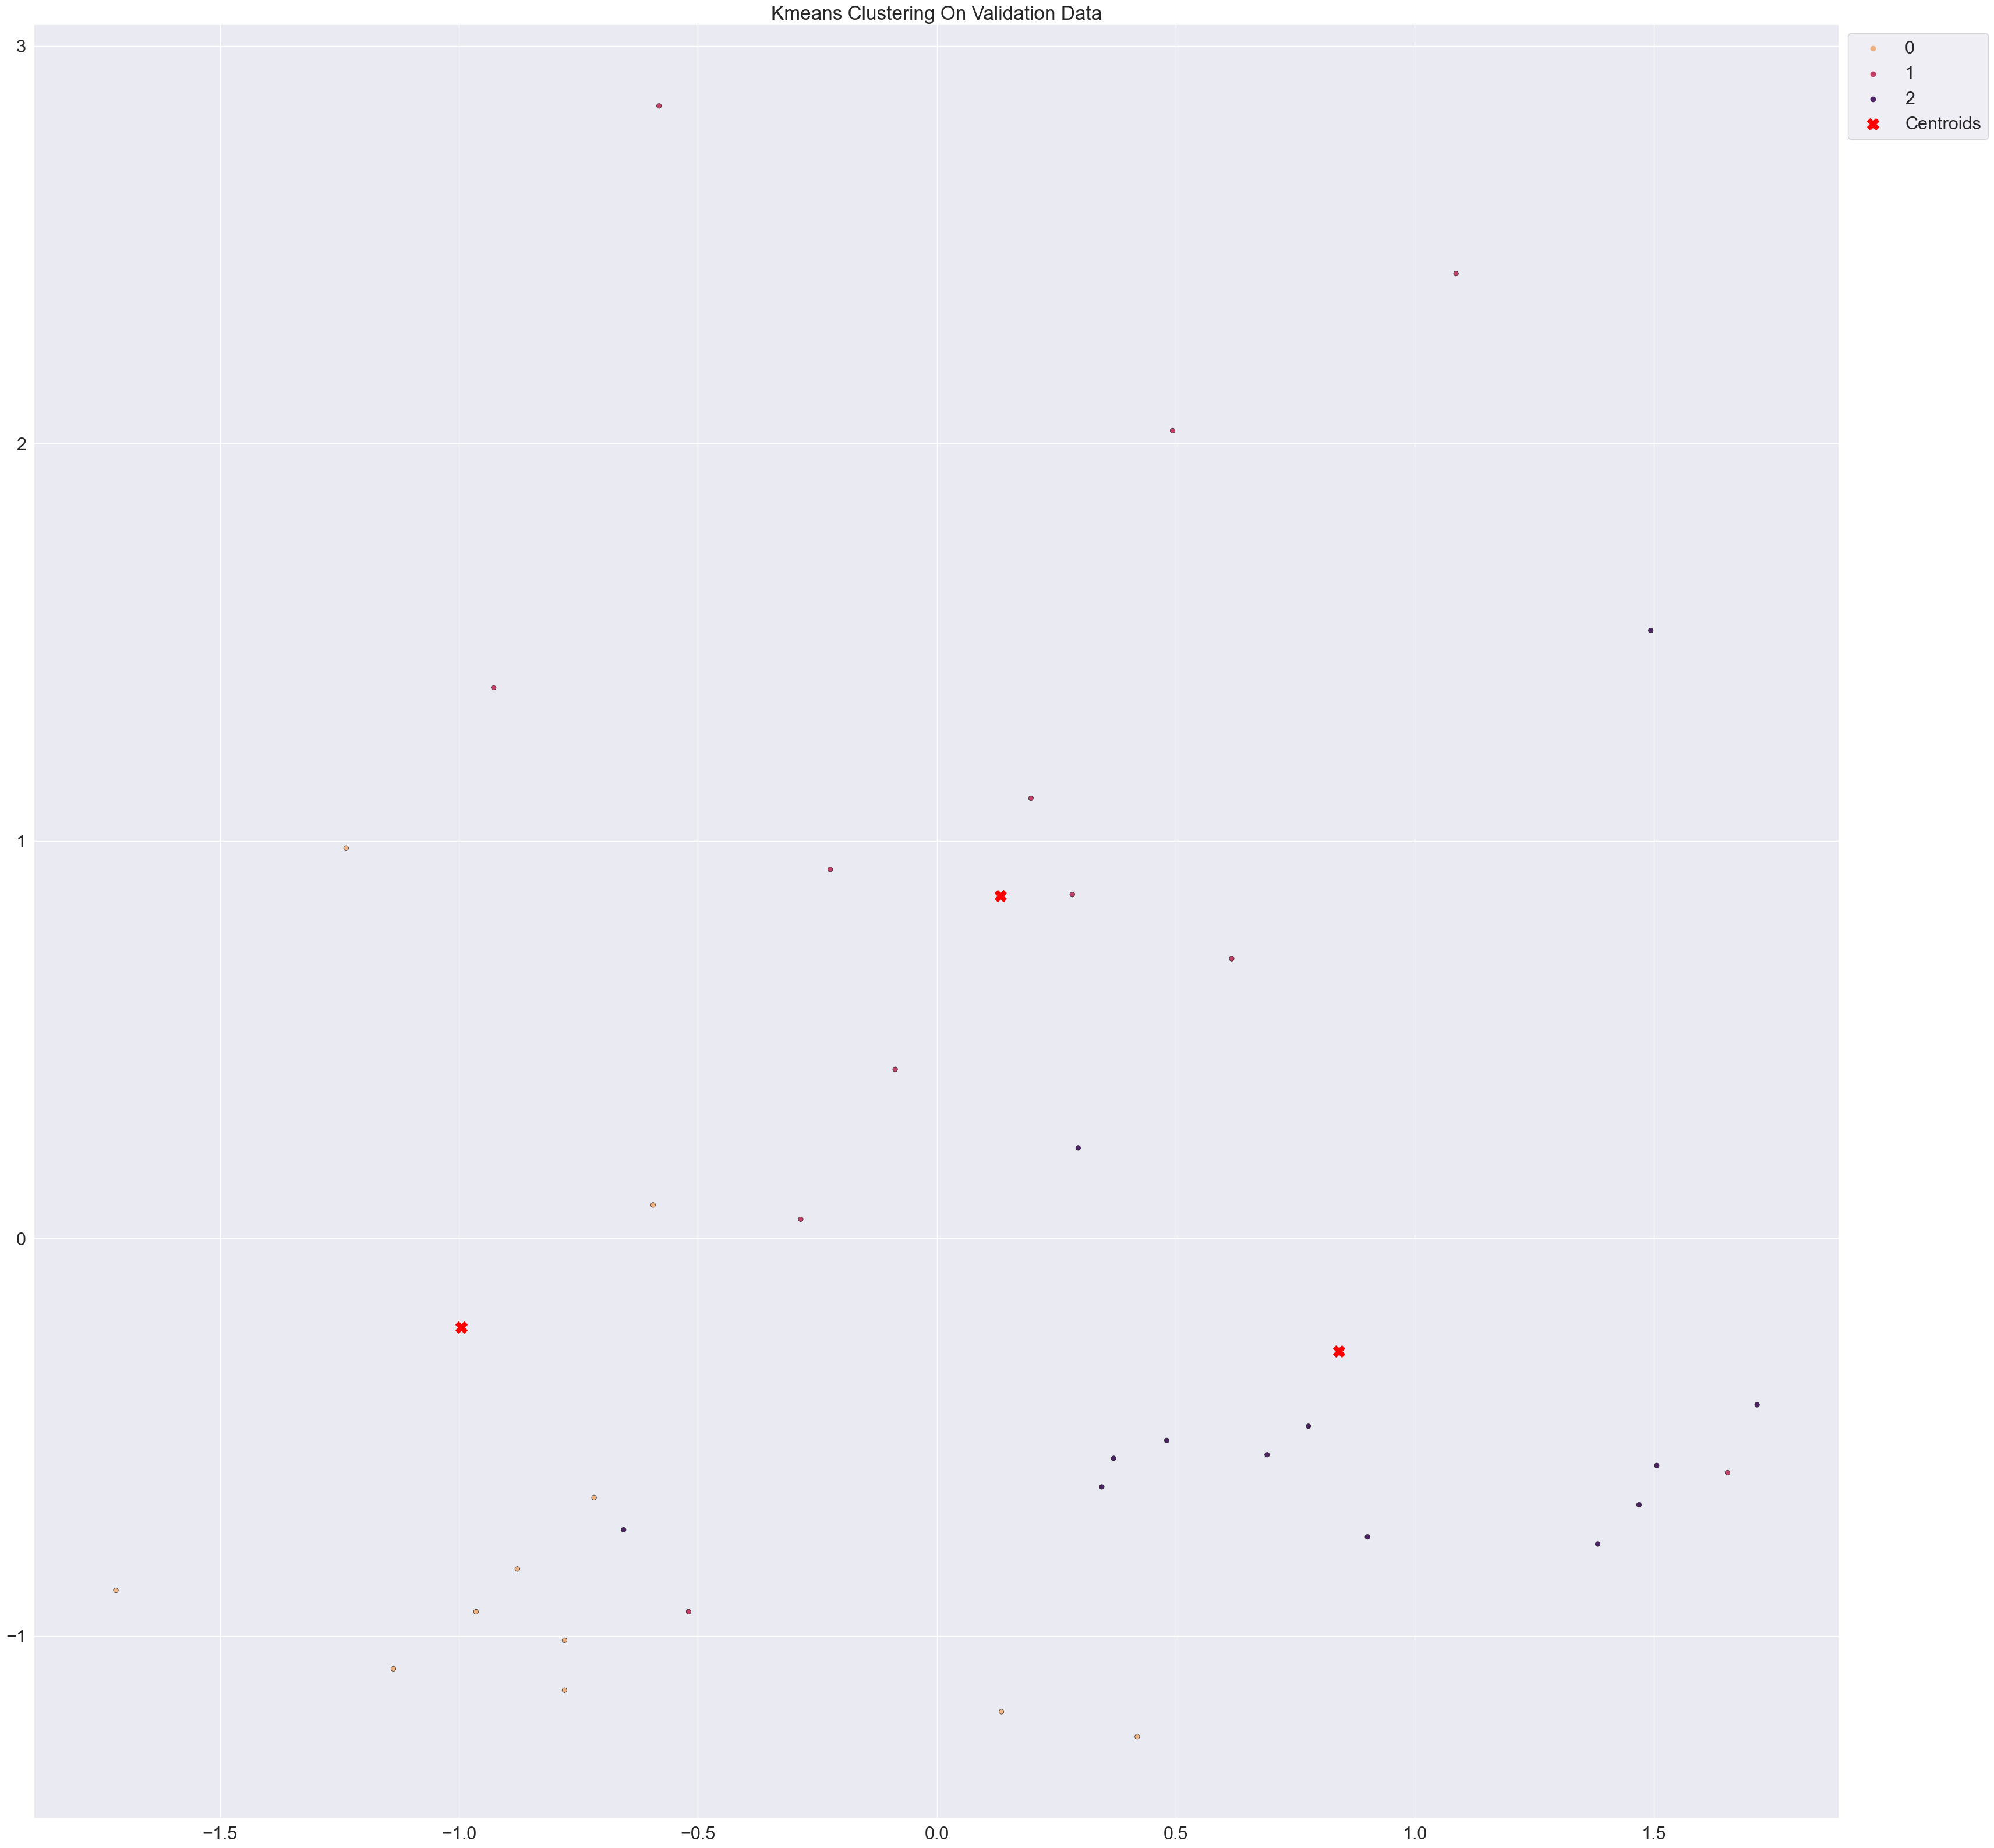

Silhouette Score on Validation Set: 0.26897452670931055


In [22]:
sns.scatterplot(x=x_val[:,0], y= x_val[:,1], data= x_val, hue=labels_validation, palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Validation Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Validation Set: {val_kmeans_avg}')

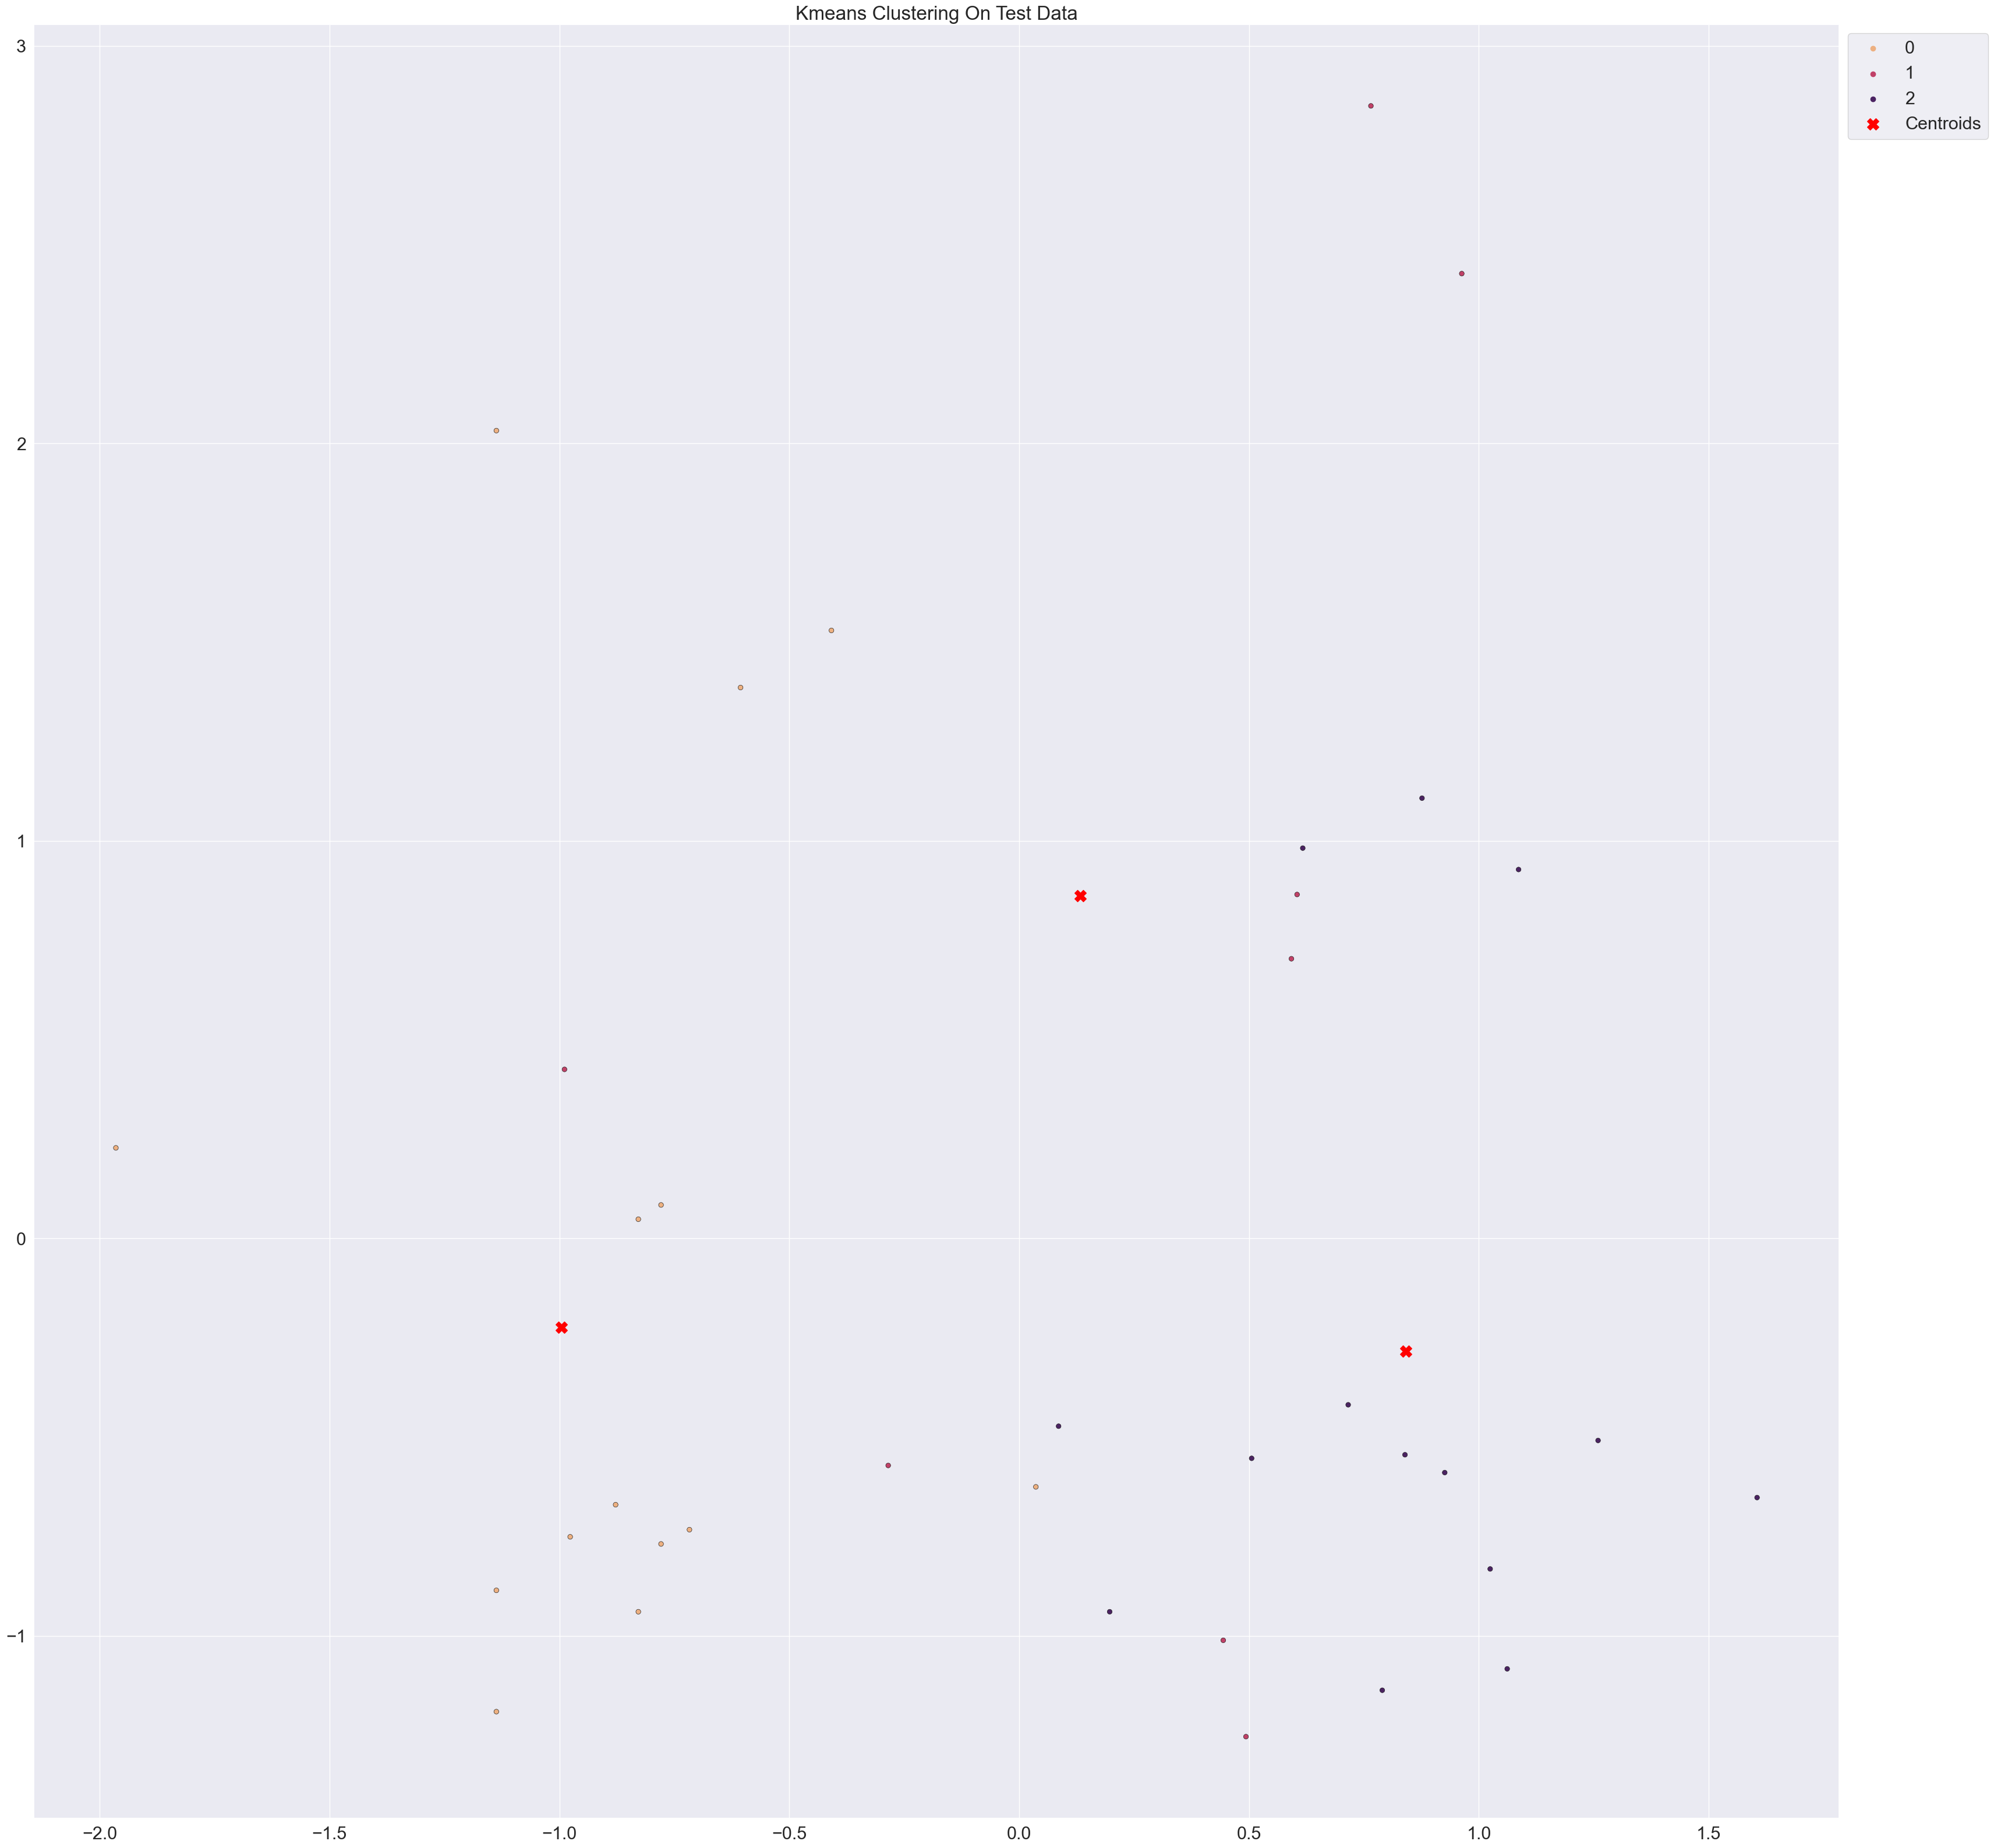

Silhouette Score on Test Set: 0.2917317787282072


In [23]:
sns.scatterplot(x=x_test[:,0], y= x_val[:,1], data= x_test, hue=labels_test, palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Test Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Test Set: {test_kmeans_avg}')

Agglomerative Clustering a hierarchical clustering algorithm ¶
Agglomerative Clustering is a hierarchical clustering algorithm that builds a hierarchy of clusters. The algorithm starts with each data point as a single cluster and successively merges the closest pairs of clusters until a single cluster containing all data points is formed. This hierarchical structure is often represented as a dendrogram.

In [24]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

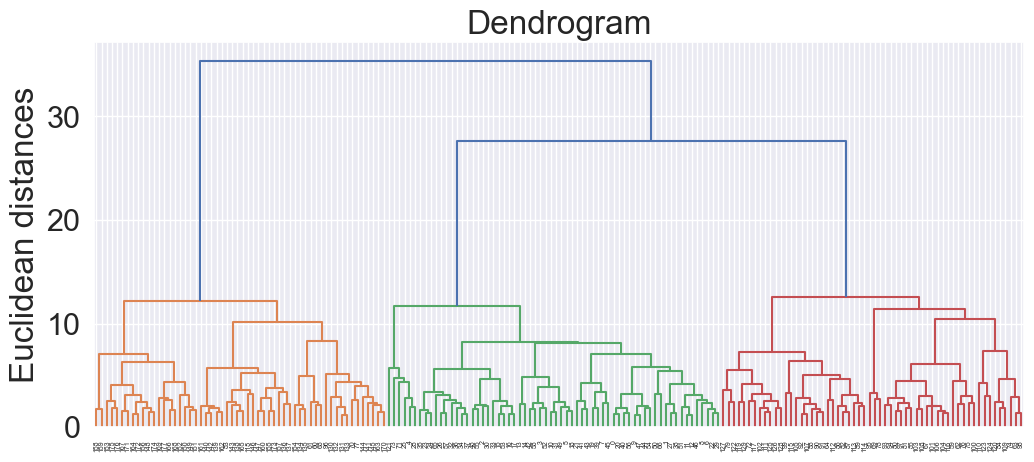

In [25]:
# Plotting a dendrogram
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X_standardized, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [26]:
model = AgglomerativeClustering(n_clusters=3)

labels_train_A = model.fit_predict(x_train)
silhouette_avg_train = silhouette_score(x_train, labels_train_A)

labels_validation_A = model.fit_predict(x_val)
silhouette_avg_val = silhouette_score(x_val, labels_validation_A)

labels_test_A = model.fit_predict(x_test)
silhouette_avg_test = silhouette_score(x_test, labels_test_A)

results.append({'Model Name' : 'Agglomerative Clustering',
                'Training Set ': silhouette_avg_train,
                'Validation Set' : silhouette_avg_val,
                 'Testing Set': silhouette_avg_test})

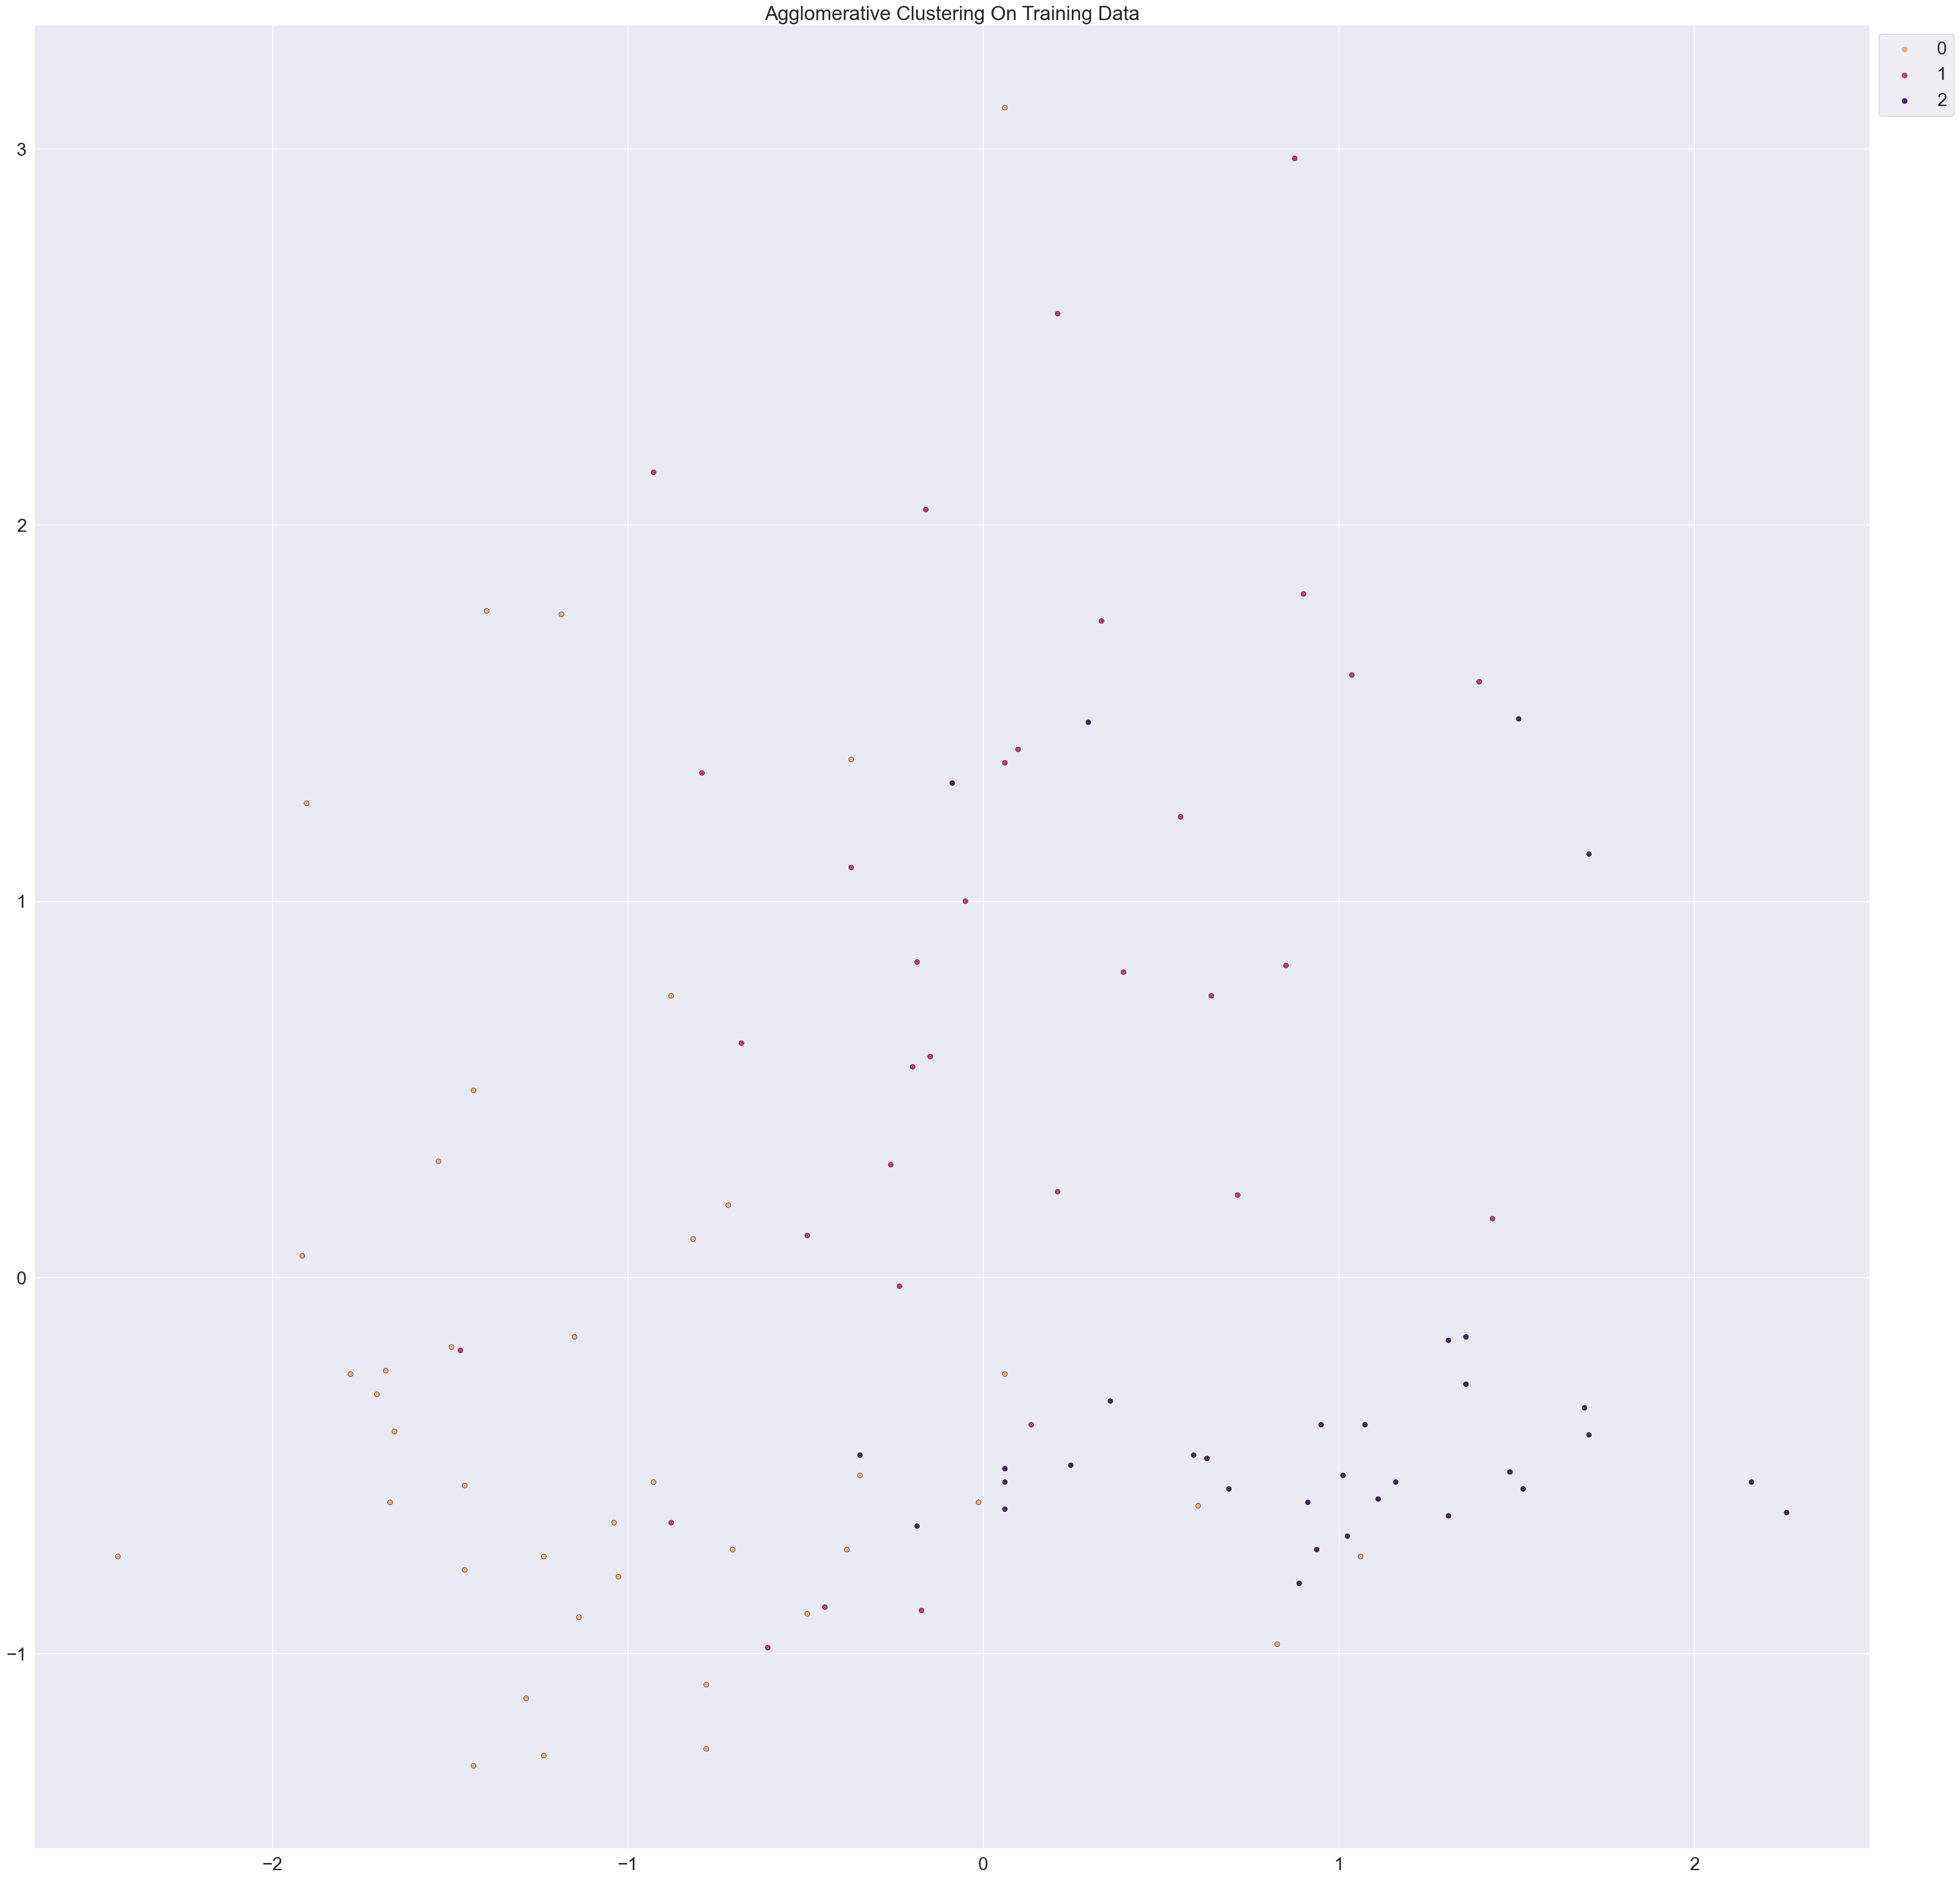

In [27]:
sns.scatterplot(x=x_train[:,0], y= x_train[:,1], data= x_train, hue=labels_train_A,palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Training Data')
plt.show()

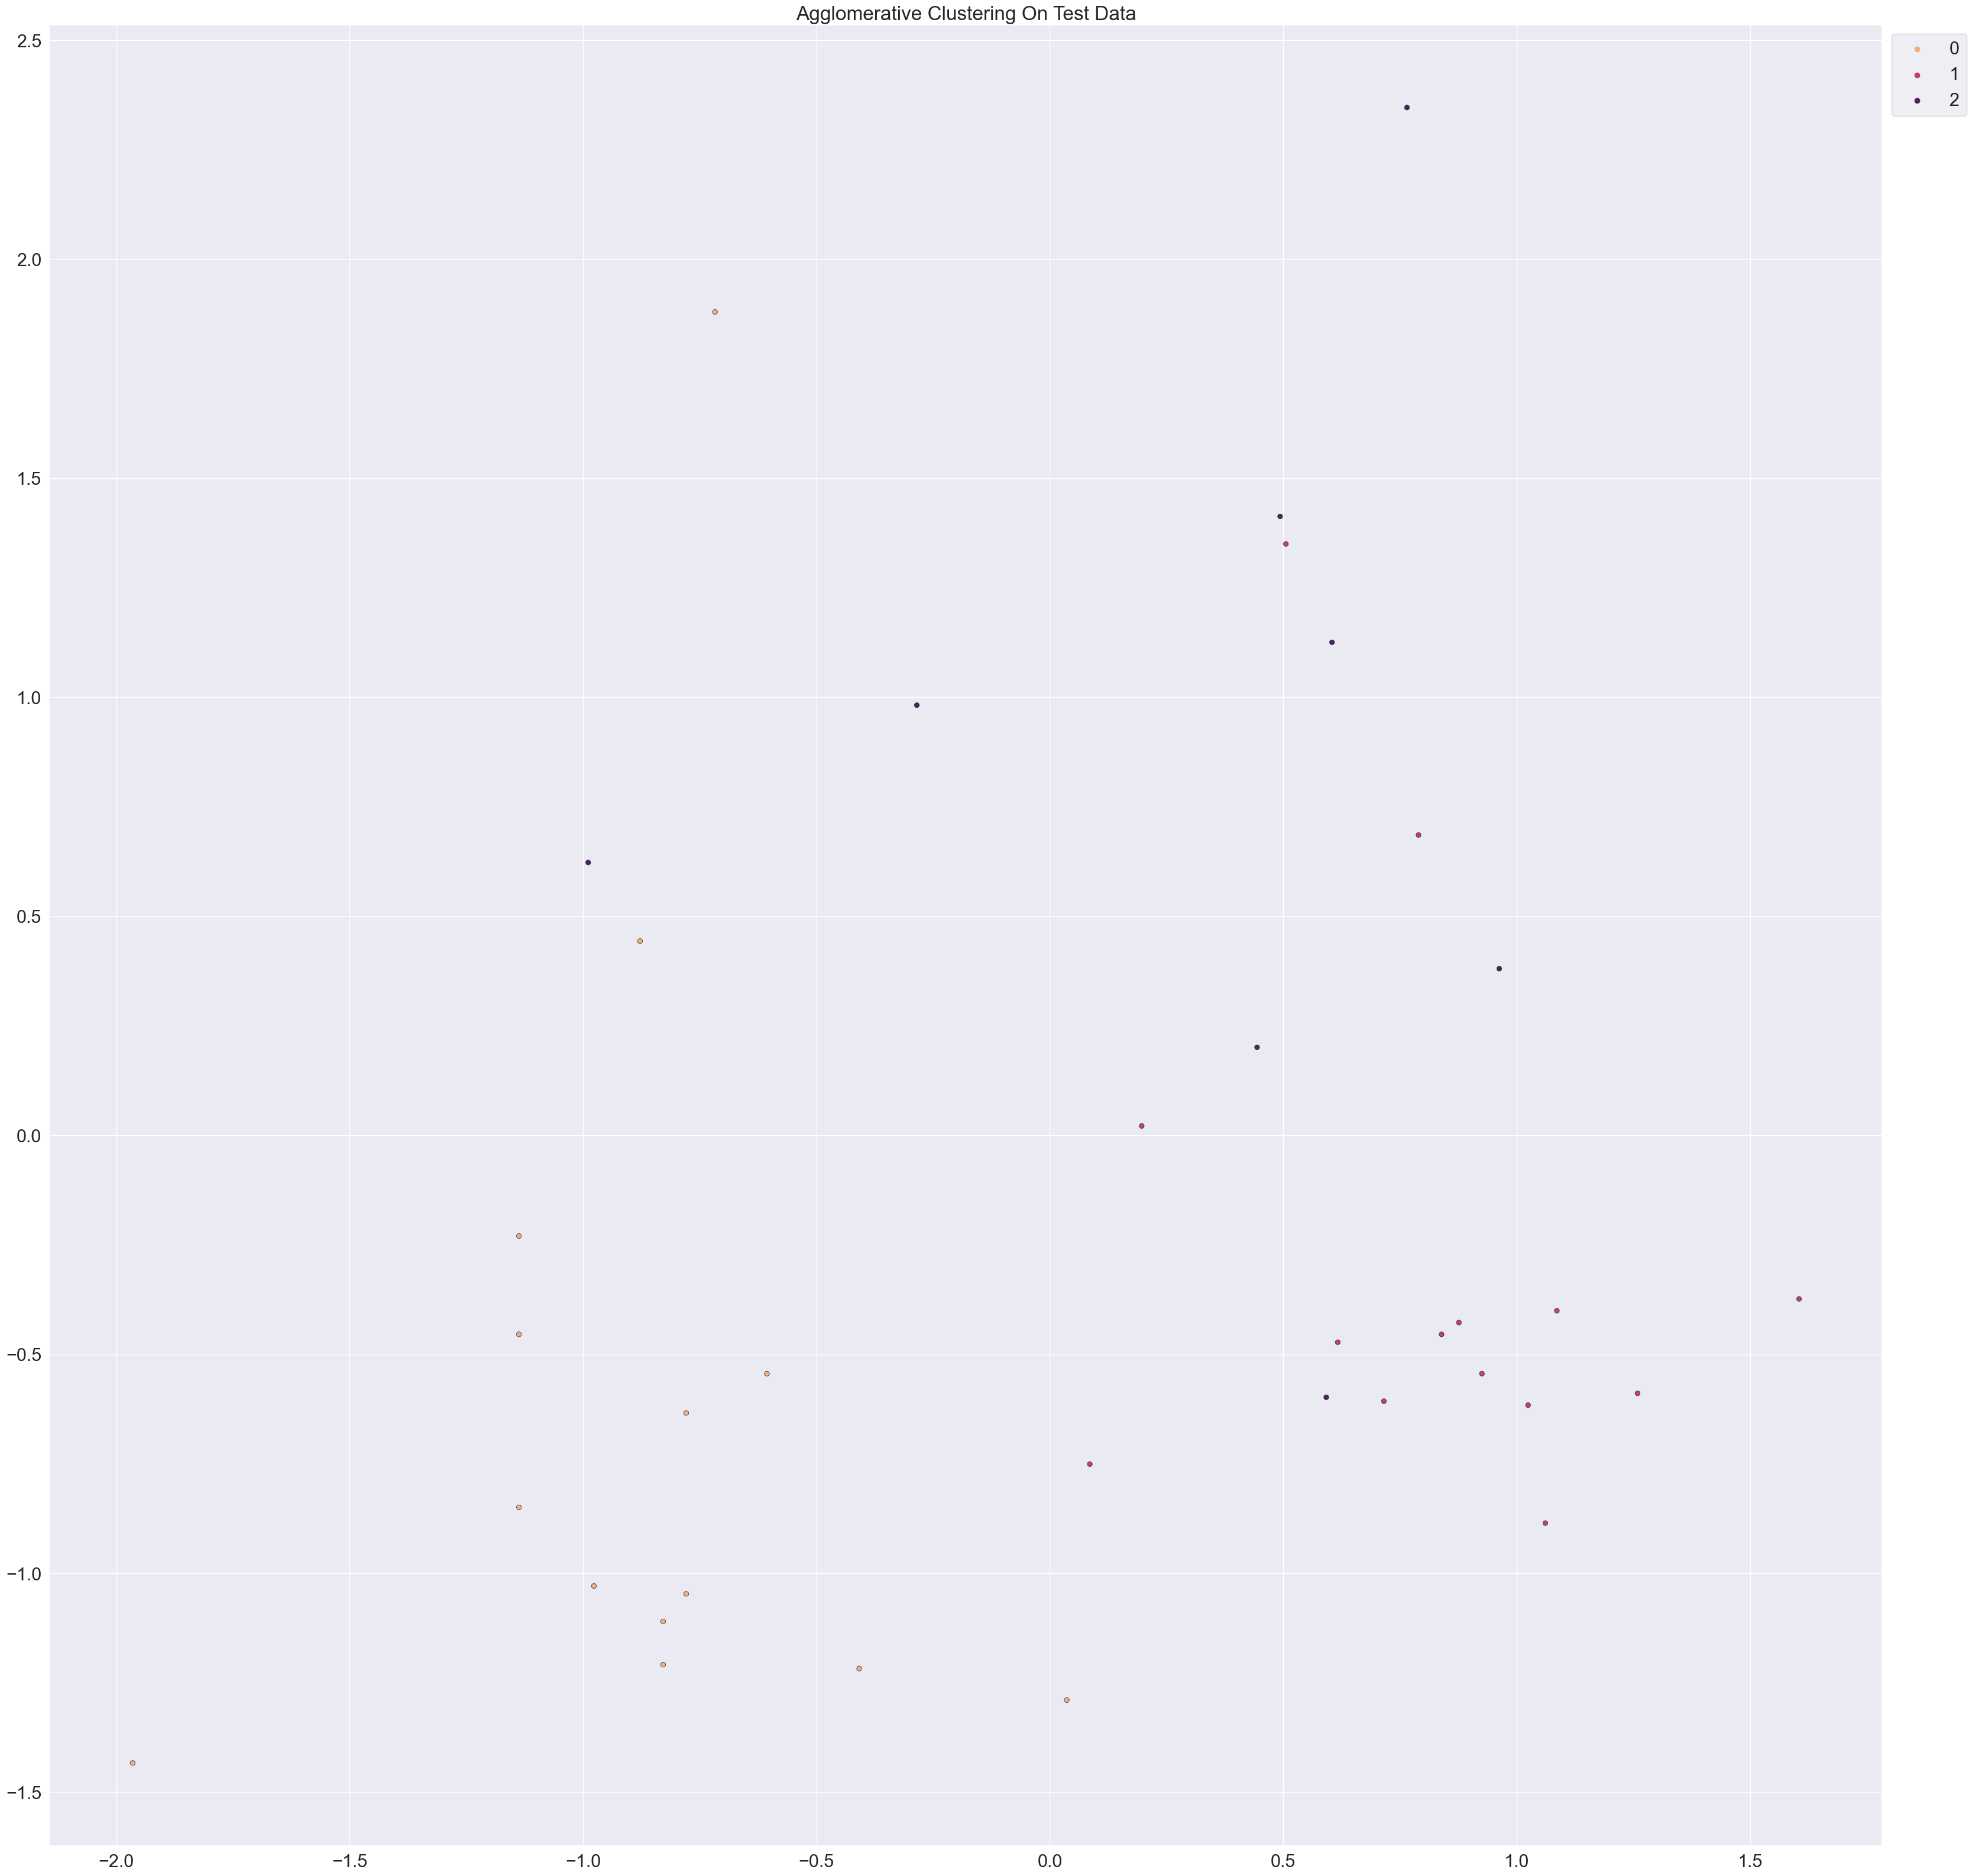

In [28]:
sns.scatterplot(x=x_test[:,0], y= x_test[:,1], data= x_test, hue=labels_test_A, palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Test Data')
plt.show()

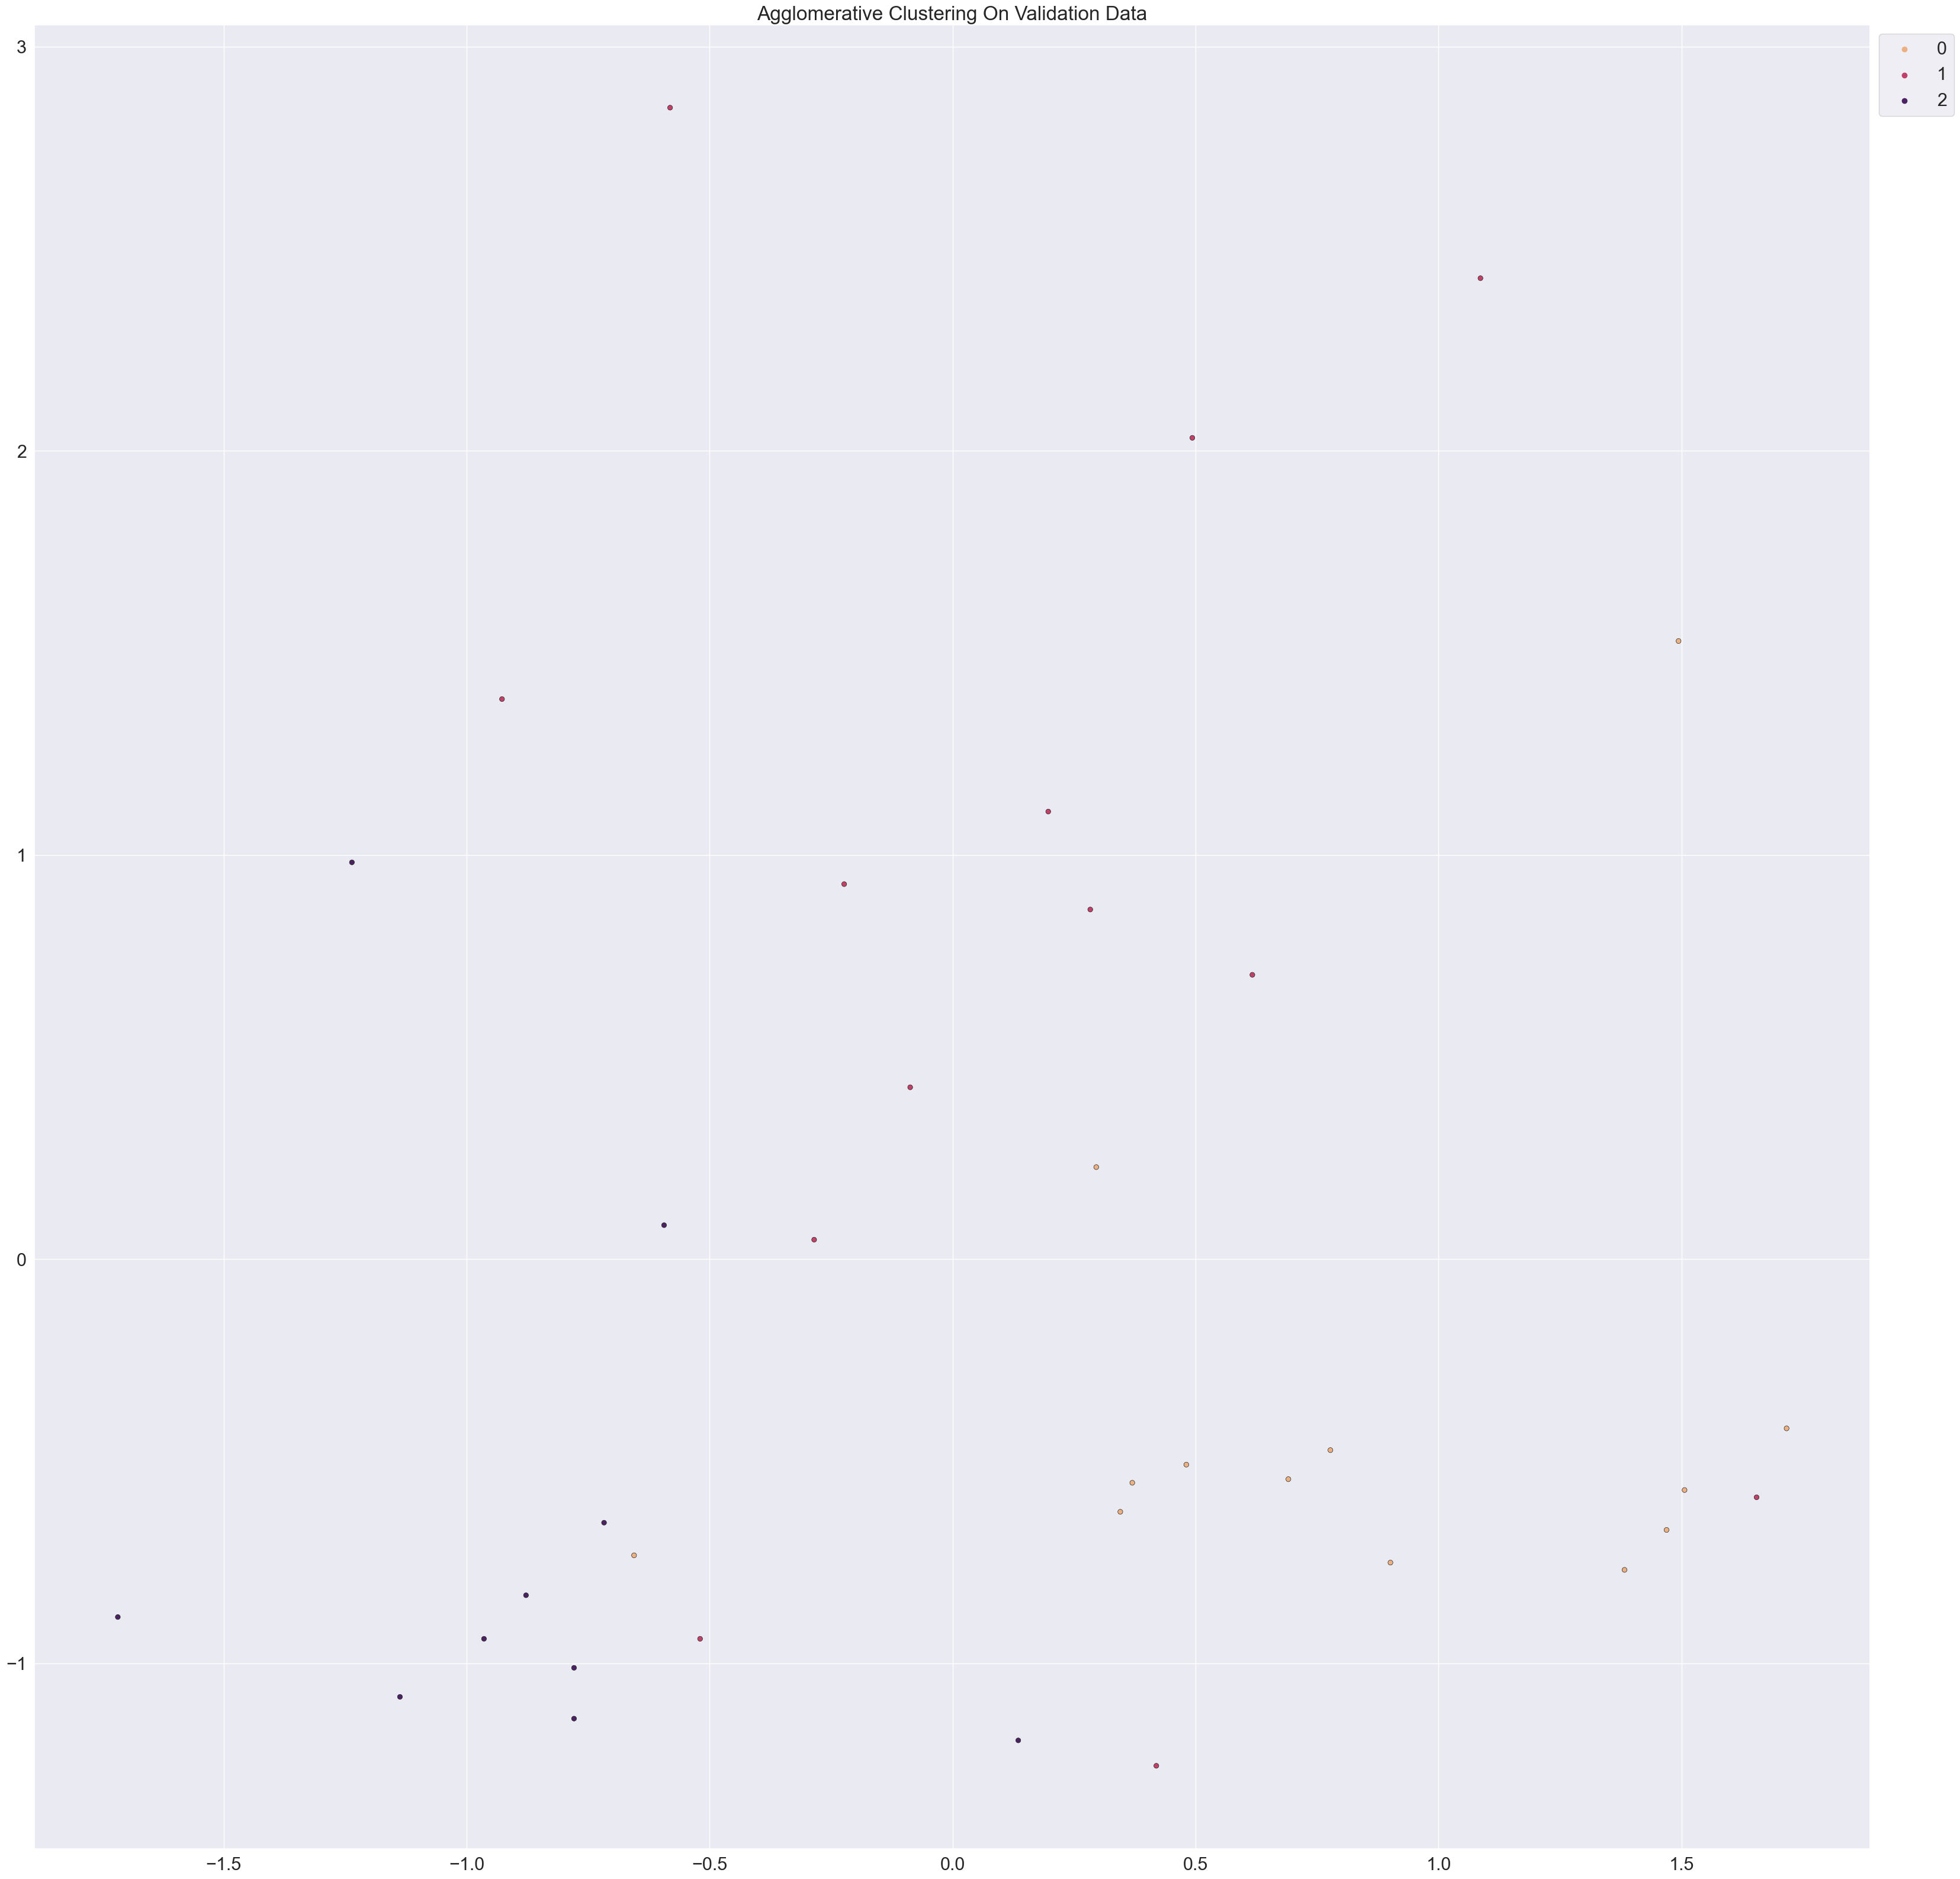

In [29]:
sns.scatterplot(x=x_val[:,0], y= x_val[:,1], data= x_val, hue=labels_validation_A,palette= 'flare',edgecolor='k')
plt.title('Agglomerative Clustering On Validation Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [30]:
# Applying PCA, n_components = 2 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
pca_data = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
print('Shape after PCA: ', pca_data.shape)
print('Original shape: ', X_standardized.shape)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Shape after PCA:  (178, 2)
Original shape:  (178, 13)
Cumulative variance explained by 2 principal components: 55.41%


Text(0.5, 1.0, 'PCA Plot')

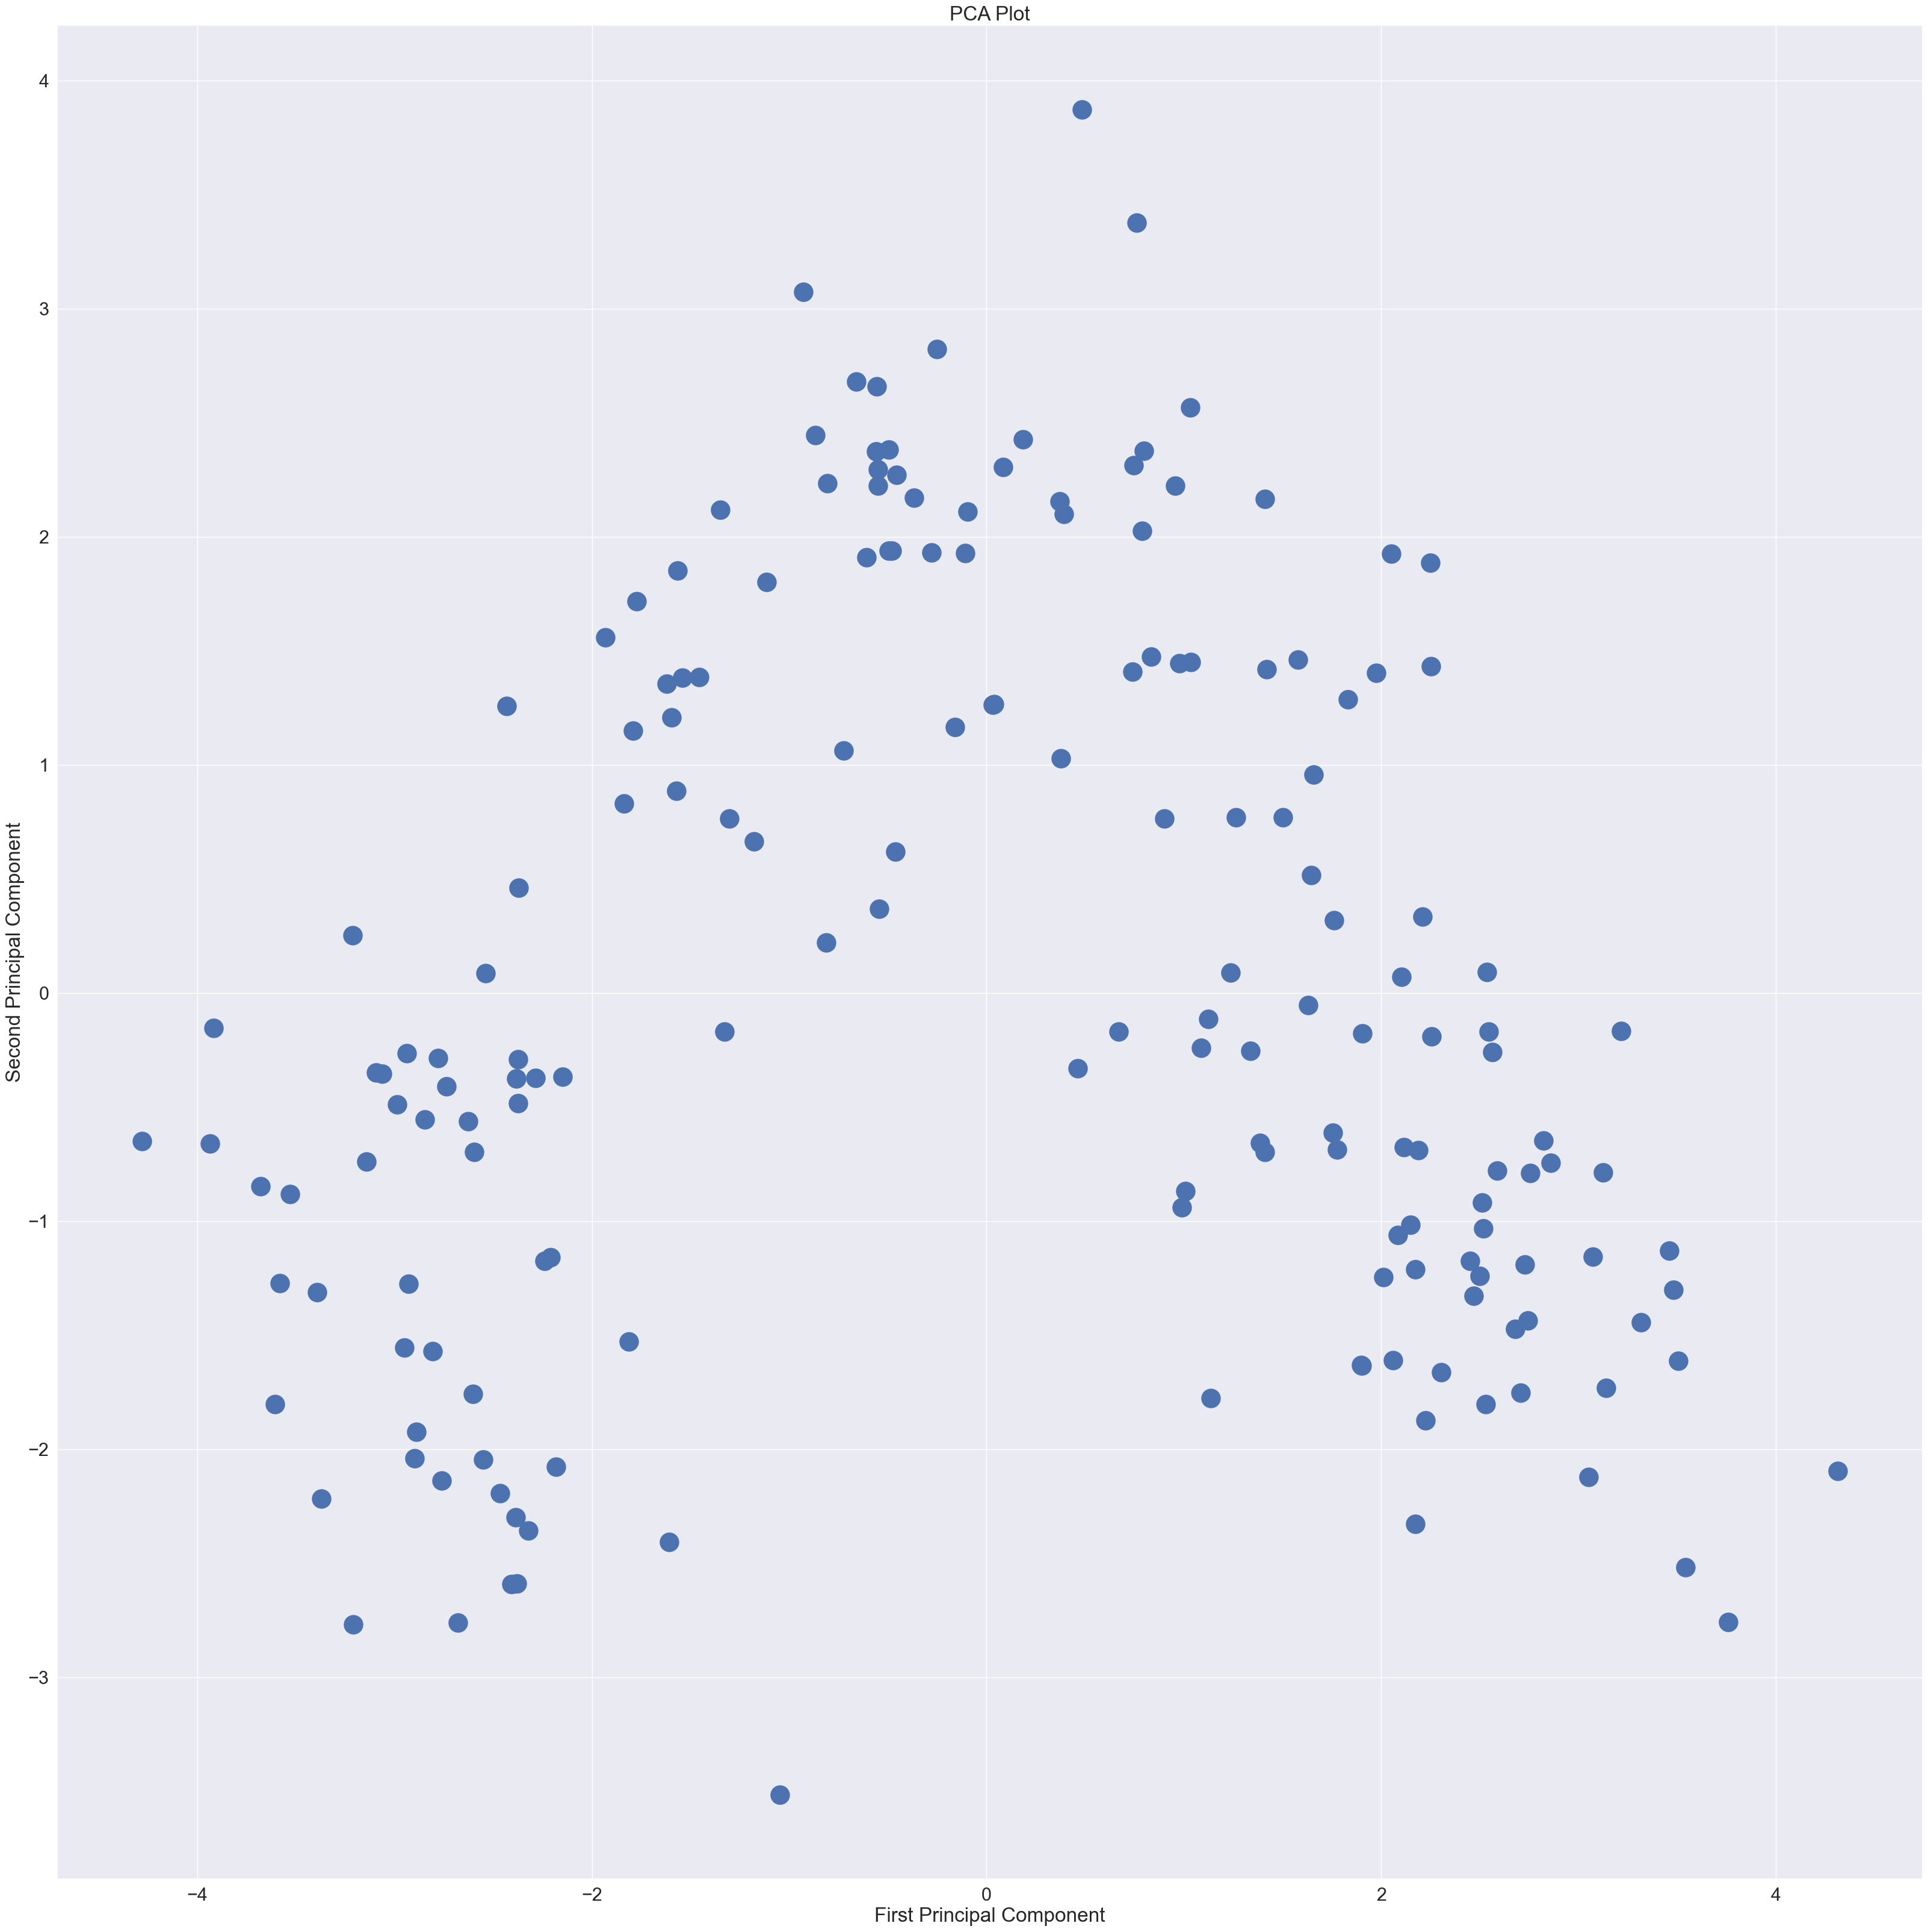

In [31]:
# Plotting PCA, n_components = 2
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1],s=500)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')

Shape after PCA:  (106, 2)


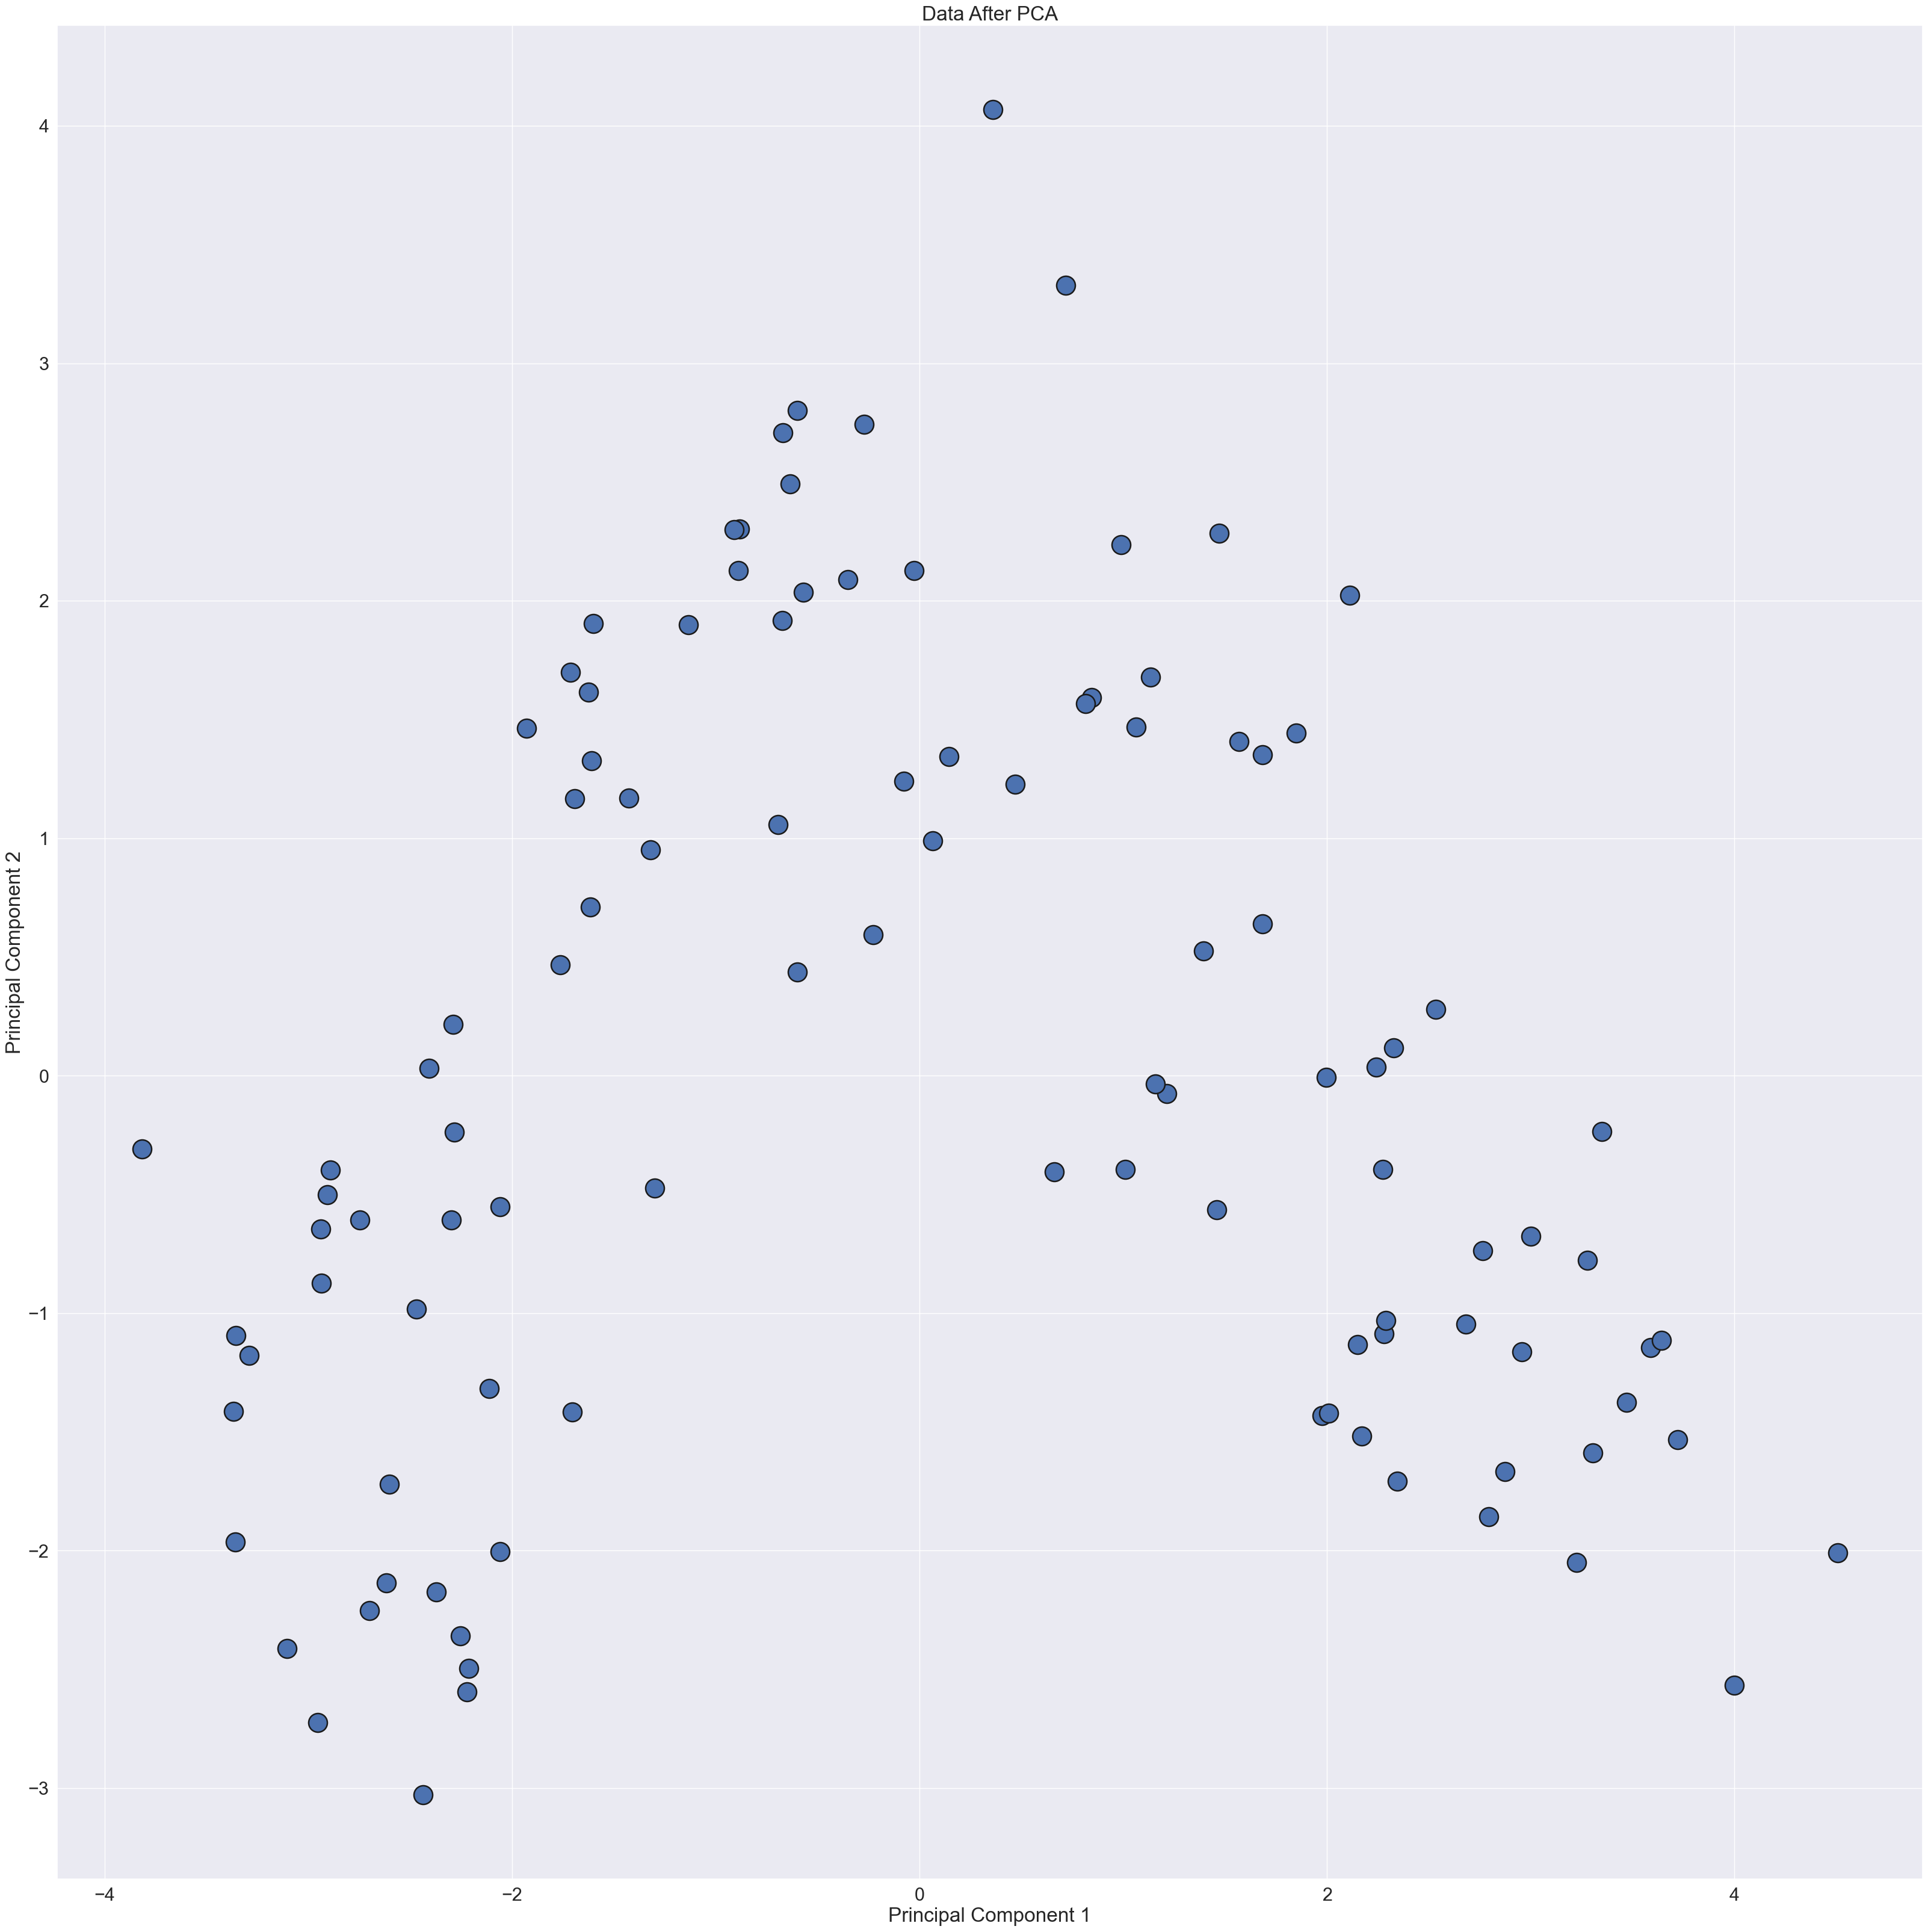

In [46]:
# Apply PCA to reduce dimensionality on the subsets - train, validation and test
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.fit_transform(x_val)
x_test_pca = pca.fit_transform(x_test)
print('Shape after PCA: ', x_train_pca.shape)

# Visualize the data after PCA
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], data=x_train_pca, marker='o', s=500, edgecolor='k')
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


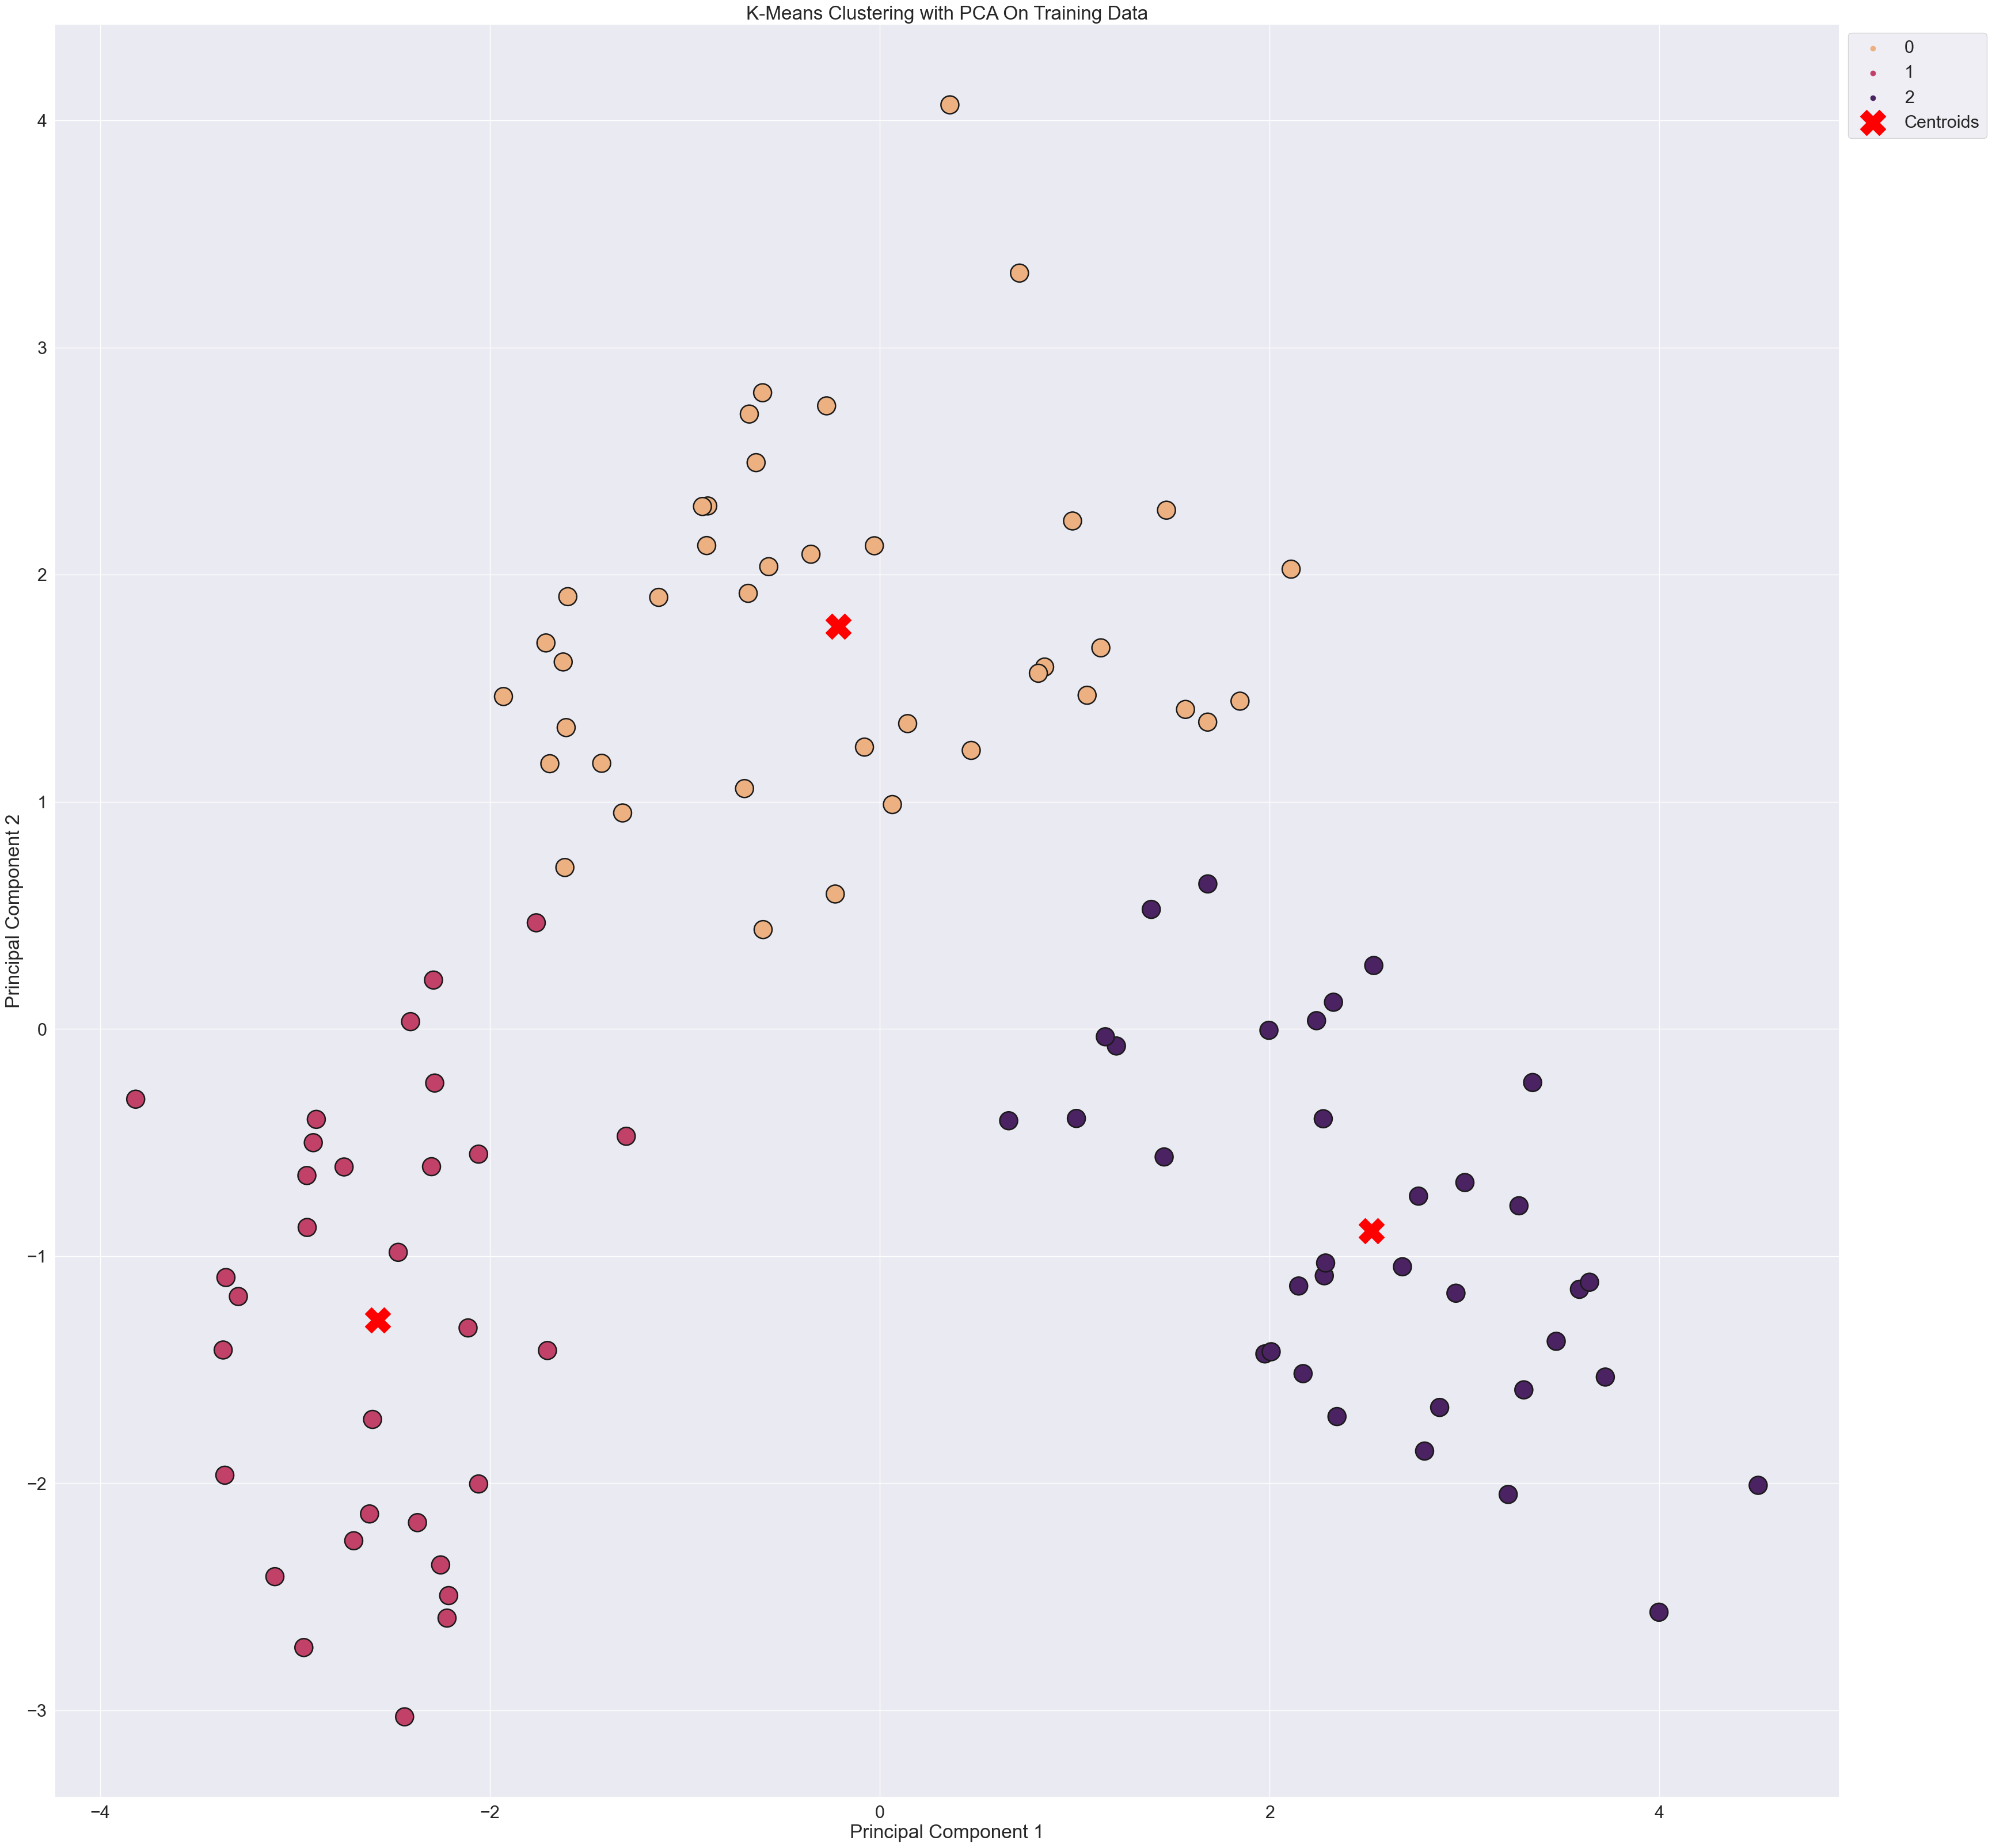

Silhouette train set Score: 0.5603726386000917


In [41]:
# Apply K-Means clustering on the PCA-transformed data
k_means = KMeans(n_clusters=3, random_state=42,n_init=10)
labels = k_means.fit_predict(x_train_pca)
labels_val = k_means.predict(x_val_pca)
labels_test = k_means.predict(x_test_pca)

# Silhouette_score for train, val ,test sets
train_pca_avg = silhouette_score(x_train_pca, labels)
val_pca_avg = silhouette_score(x_val_pca, labels_val)
test_pca_avg = silhouette_score(x_test_pca, labels_test)

# Visualize the clustering result
sns.scatterplot(x= x_train_pca[:, 0], y=x_train_pca[:, 1], data=x_train_pca, hue=labels, marker='o', s=500,palette='flare',edgecolor='k')
#sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=1000, label='Centroids')
plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette train set Score: {train_pca_avg}')


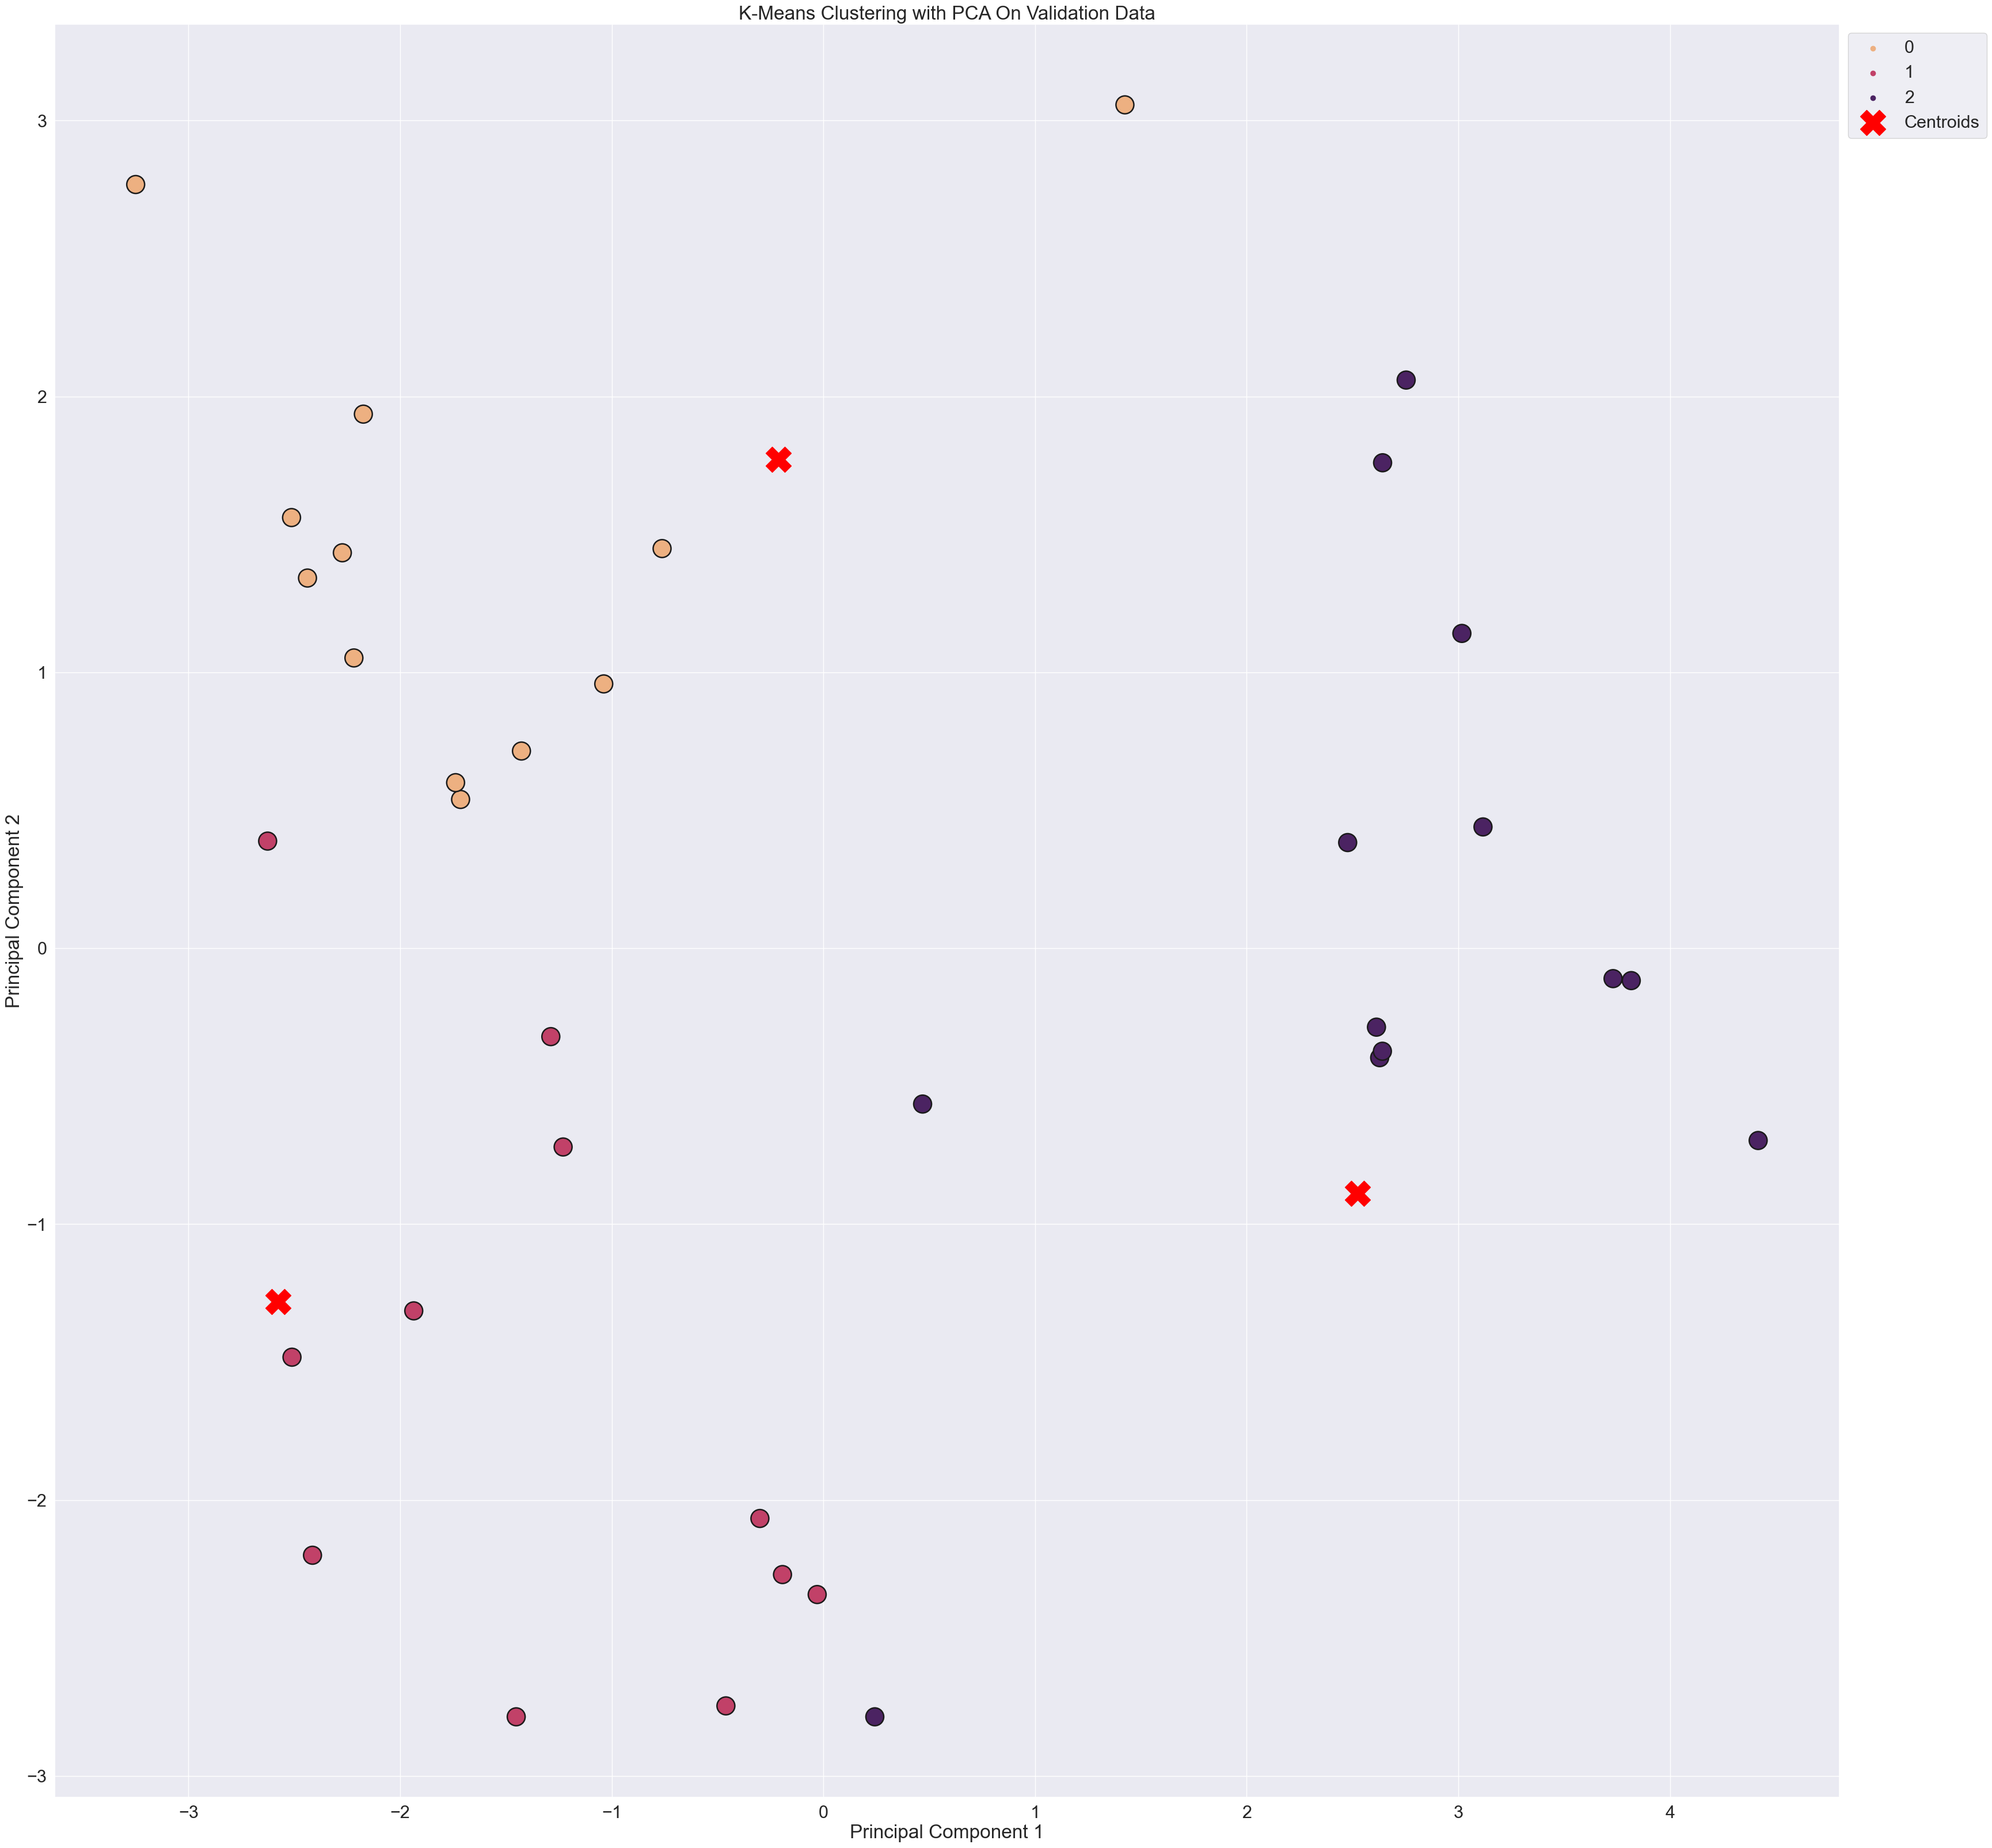

Silhouette Score on Validation Set: 0.4573229114021161


In [43]:
sns.scatterplot(x= x_val_pca[:, 0], y=x_val_pca[:, 1], data=x_val_pca, hue=labels_val, marker='o', s=500, edgecolor='k',palette='flare')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=1000, label='Centroids')
#sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Validation Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


print(f'Silhouette Score on Validation Set: {val_pca_avg}')

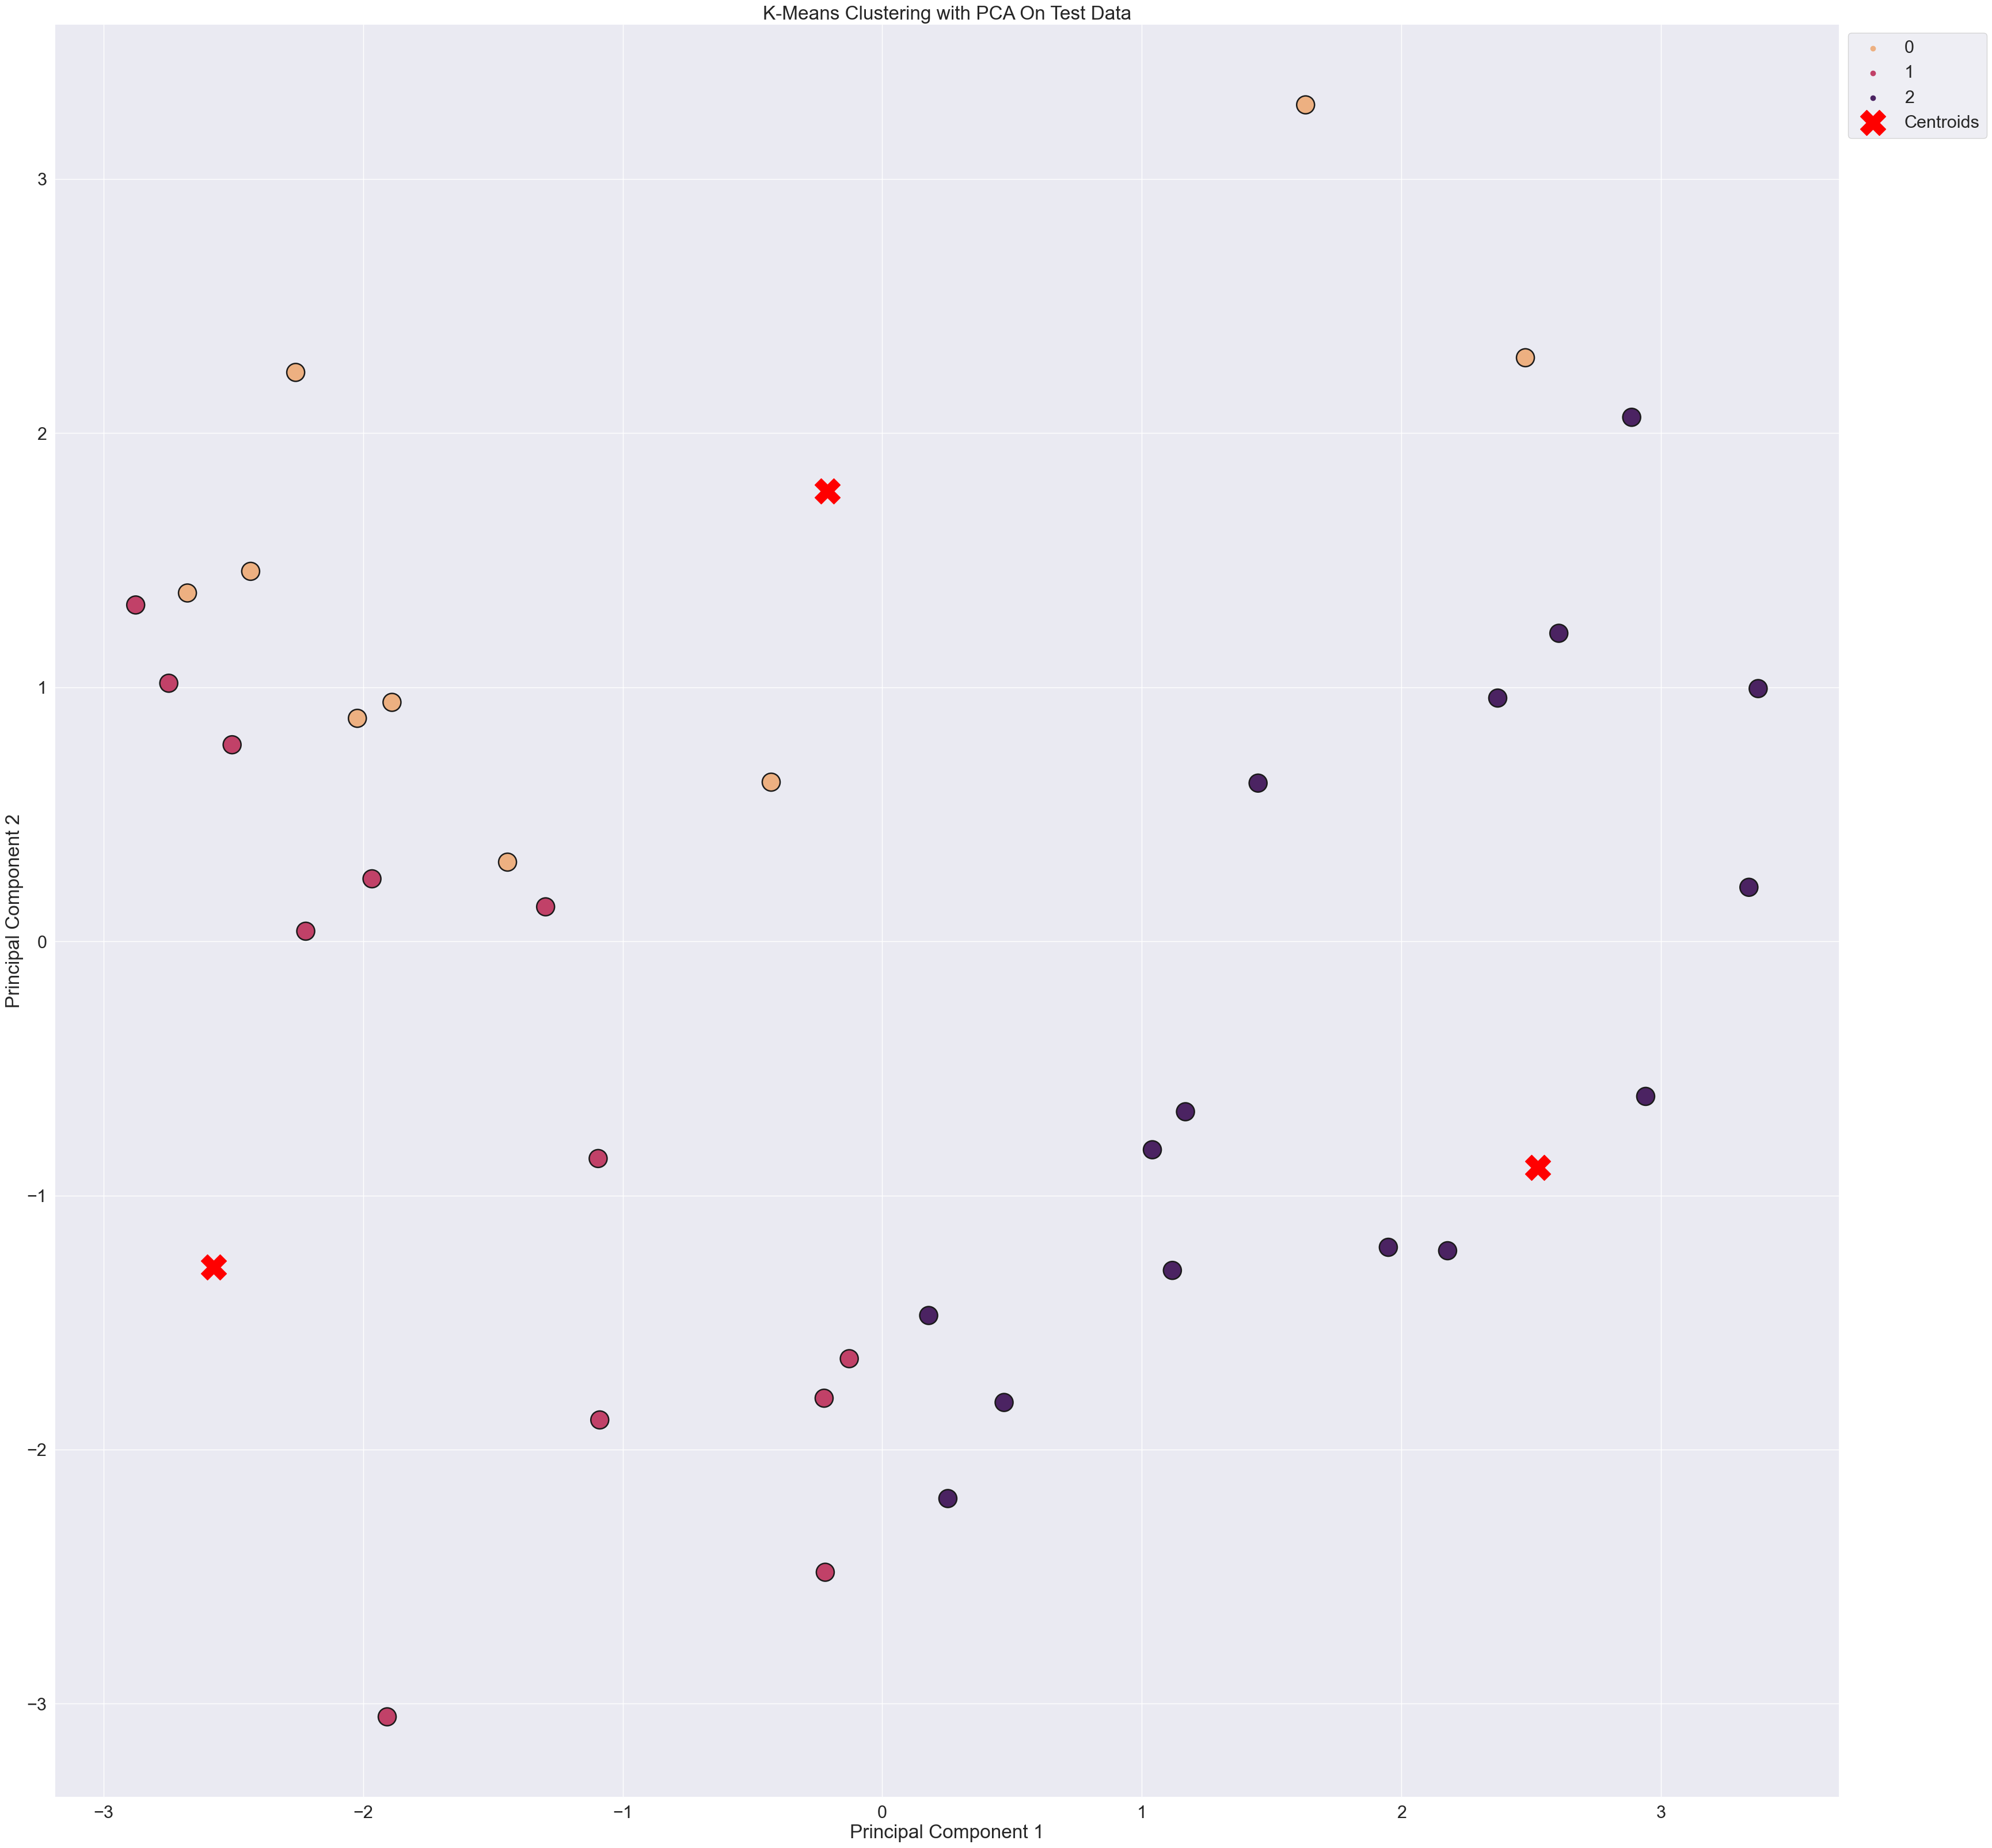

Silhouette Score on Validation Set: 0.20189294490586665


In [45]:
scatter = sns.scatterplot(x= x_test_pca[:, 0], y=x_test_pca[:, 1], data=x_test_pca, hue=labels_test, marker='o', s=500, edgecolor='k',palette='flare')
#sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=1000, label='Centroids')
plt.title('K-Means Clustering with PCA On Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Validation Set: {test_pca_avg}')

In [36]:
results.append({'Model Name' : 'PCA with Kmeans',
                'Training Set ': train_pca_avg,
                'Validation Set' : val_pca_avg,
                 'Testing Set': test_pca_avg})

results_df = pd.DataFrame(results)

print('\033[1m' + '\nSilhouette Score for Models:' +'\033[0m')
display(results_df)


Silhouette Score for Models:


Model Name  Training Set   Validation Set  Testing Set
0                    Kmeans       0.280862        0.268975     0.291732
1  Agglomerative Clustering       0.275638        0.271731     0.291732
2           PCA with Kmeans       0.560373        0.457323     0.201893